### 💻 분석 데이터 : 버스 승차요청 이력 데이터  
-> 사용자의 요청에 따라 운행 경로를 바꿔 운행하는 버스 서비스

❕요청사항  
**배차요청수요의 특성을 파악할 수 있는 분석 진행**   
분석1) 출발지, 목적지 사이의 거리분포  
분석2) 누적요청시간 시각화  
분석3) 누적요청횟수 시각화  
분석4) 1회요청만으로 실제 버스를 탑승한 사용자 수  
분석5) 배차대기시간 분포 시각화  
분석6) 차내 이동시간 시각화  
분석7) 통행시간별 승차수요 시각화  
분석8) 수요상위 10개 정류장 - 월/시간별 정류장별 이용수요의 증감 시각화  
분석9) 지역별 전월대비 증감률  
분석10) 연령대별(어른, 청소년, 어린이) 월별/시간대별 수요  
분석11) 지역별/시간대별 정류장방면 분석  

### - 패키지 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#경고무시
import warnings
warnings.filterwarnings('ignore')
# 한글처리
plt.rc('font', family='Malgun Gothic')
# '-' 문자 처리
plt.rc('axes', unicode_minus=False)

### - 전처리 후 데이터 불러오기

In [2]:
data=pd.read_csv("new_전처리.csv", low_memory=False)

#전체 열 보이도록 수정
pd.set_option('display.max_columns', None)

In [3]:
df=data

In [4]:
#날짜 계산을 위해 '요청시간', '최초요청시간', '승차시간', '하차시간'컬럼을 날짜형식으로 바꿔줌
#함수 : 데이터프레임명['컬럼명']=pd.to_datetime(데이터프레임명['컬럼명'])
from datetime import datetime
df['요청시간']=pd.to_datetime(df['요청시간'])
df['최초요청시간']=pd.to_datetime(df['최초요청시간'])
df['승차시간']=pd.to_datetime(df['승차시간'])
df['하차시간']=pd.to_datetime(df['하차시간'])

- 지역구분

In [5]:
계양=df[df['지역']=='계양']
검단=df[df['지역']=='검단']
송도=df[df['지역']=='송도']

In [6]:
print('전체 row :', len(df))
print('계양 row :', len(계양))
print('검단 row :', len(검단))
print('송도 row :', len(송도))

전체 row : 2064519
계양 row : 9333
검단 row : 187464
송도 row : 1867722


### - 실수요 데이터의 상태를 파악

In [7]:
#실수요 데이터만 가져와서 각각의 값들을 count(실수요여부가 1인 데이터 기준)
상태=pd.DataFrame(df[df['실수요여부']==1].상태.value_counts())
상태.columns=['count']

#비율계산
상태['%']=round(상태['count']/sum(상태['count'])*100,2)
상태

,count,%
하차완료,180232,41.22
배차불가,153292,35.06
시뮬레이션취소,70777,16.19
탑승취소,32064,7.33
시스템취소,852,0.19
배차불가 (중복된 이용신청),33,0.01


-> 실수요 고객들 중 35.06%%가 배차 불가로 서비스를 이용하지 못함.

-> 41.22%의 고객이 실제로 서비스를 이용한 것을 확인.

### 🔗 분석1) 출발지, 목적지 사이의 거리분포(하차완료 고객 데이터 활용)

### 1-1. 계양

In [8]:
#상태가 하차완료이면서 중복을 제외하기 위해 실수요여부가 1인 데이터만 추출
거리=계양[(계양['상태']=='하차완료')&(계양['실수요여부']==1)][['거리']]

In [9]:
거리.거리.min(), 거리.거리.max()

(0.03, 5.23)

-> 출발지~목적지 사이의 직선거리는 0.03부터 최대 5.23으로 확인

<AxesSubplot:xlabel='거리', ylabel='Density'>

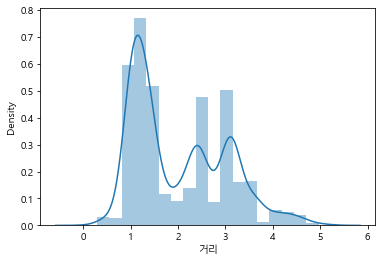

In [10]:
sns.distplot(거리['거리'])

-> 연속형 변수인 거리의 히스토그램과 히스토그램을 매끄럽게 선으로 표현한 밀도추정그래프입니다. 계양지역에서 운행하는 버스의 출발지~목적지 사이의 거리 분포를 확인할 수 있습니다

### 1-2. 검단

In [11]:
#상태가 하차완료이면서 중복을 제외하기 위해 실수요여부가 1인 데이터만 추출
거리=검단[(검단['상태']=='하차완료')&(검단['실수요여부']==1)][['거리']]

In [12]:
거리.거리.min(), 거리.거리.max()

(0.06, 5.99)

-> 출발지~목적지 사이의 직선거리는 0.06부터 최대 5.99으로 확인

<AxesSubplot:xlabel='거리', ylabel='Density'>

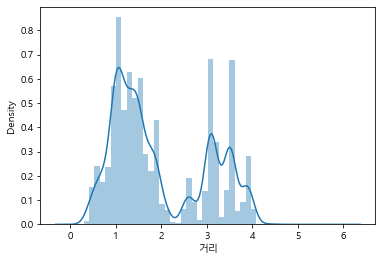

In [13]:
sns.distplot(거리['거리'])

-> 연속형 변수인 거리의 히스토그램과 히스토그램을 매끄럽게 선으로 표현한 밀도추정그래프입니다. 검단지역에서 운행하는 버스의 출발지~목적지 사이의 거리 분포를 확인할 수 있습니다

### 1-3. 송도

In [14]:
#상태가 하차완료이면서 중복을 제외하기 위해 실수요여부가 1인 데이터만 추출
거리=송도[(송도['상태']=='하차완료')&(송도['실수요여부']==1)][['거리']]

In [15]:
거리.거리.min(), 거리.거리.max()

(0.04, 8.13)

-> 출발지~목적지 사이의 직선거리는 0.04부터 최대 8.13으로 확인

<AxesSubplot:xlabel='거리', ylabel='Density'>

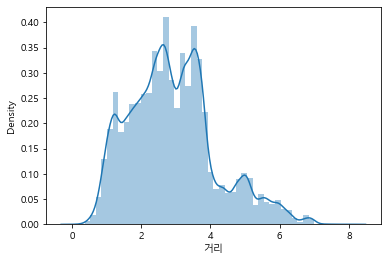

In [16]:
sns.distplot(거리['거리'])

-> 연속형 변수인 거리의 히스토그램과 히스토그램을 매끄럽게 선으로 표현한 밀도추정그래프입니다. 송도지역에서 운행하는 버스의 출발지~목적지 사이의 거리 분포를 확인할 수 있습니다

### 🔗 분석2) 누적요청시간 시각화(실수요 고객 데이터 활용)

### 2-1. 계양

In [17]:
#실수요여부가 1인 데이터만 추출
#누적요청시간=(동일사용자의 최종요청시간-최초요청시간)
#단위 : 초기준
누적요청시간=계양[계양['실수요여부']==1][['누적요청시간']]

In [18]:
누적요청시간.누적요청시간.min(), 누적요청시간.누적요청시간.max()

(0.0, 1425.0)

-> 동일사용자의 최초요청부터 최종요청까지 소요된 시간은 0부터 최대 1425초(약 24분)으로 확인

- 누적요청시간 시각화(계양)

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

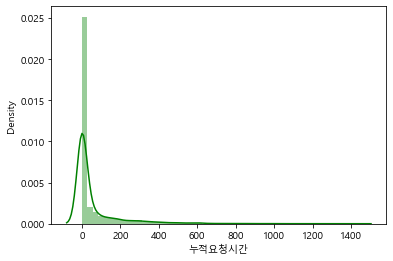

In [19]:
sns.distplot(누적요청시간['누적요청시간'], color='green')

- 그래프가 확연하게 확인되지 않으므로 누적요청시간이 1000 미만의 데이터로만 그래프 구성

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

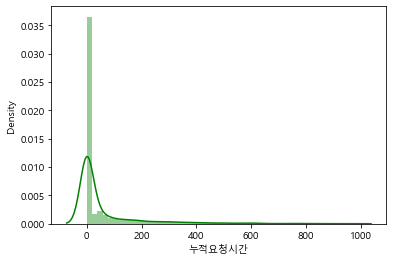

In [20]:
누적요청시간2=누적요청시간[누적요청시간['누적요청시간']<1000]
sns.distplot(누적요청시간2['누적요청시간'], color='green')

- 누적요청시간이 100미만인 데이터로 그래프 시각화

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

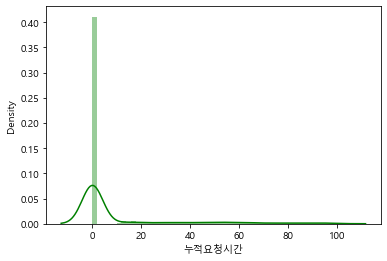

In [21]:
누적요청시간3=누적요청시간[누적요청시간['누적요청시간']<100]
sns.distplot(누적요청시간3['누적요청시간'], color='green')

### 2-2. 검단

In [22]:
#실수요여부가 1인 데이터만 추출
#누적요청시간=(동일사용자의 최종요청시간-최초요청시간)
#단위 : 초기준
누적요청시간=검단[검단['실수요여부']==1][['누적요청시간']]

In [23]:
누적요청시간.누적요청시간.min(), 누적요청시간.누적요청시간.max()

(0.0, 2193.0)

-> 동일사용자의 최초요청부터 최종요청까지 소요된 시간은 0부터 최대 2193초(약 36분)으로 확인

- 누적요청시간 시각화(검단)

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

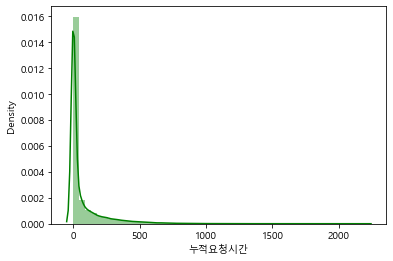

In [24]:
sns.distplot(누적요청시간['누적요청시간'], color='green')

- 그래프가 확연하게 확인되지 않으므로 누적요청시간이 1000 미만의 데이터로만 그래프 구성

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

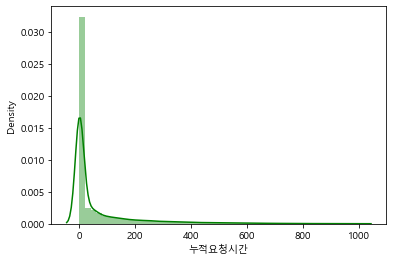

In [25]:
누적요청시간2=누적요청시간[누적요청시간['누적요청시간']<1000]
sns.distplot(누적요청시간2['누적요청시간'], color='green')

- 누적요청시간이 100미만인 데이터로 그래프 시각화

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

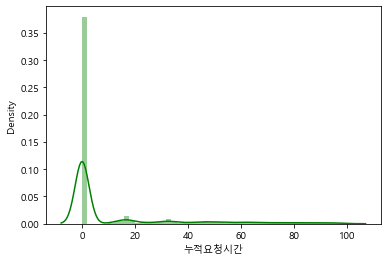

In [26]:
누적요청시간3=누적요청시간[누적요청시간['누적요청시간']<100]
sns.distplot(누적요청시간3['누적요청시간'], color='green')

### 2-3. 송도

In [27]:
#실수요여부가 1인 데이터만 추출
#누적요청시간=(동일사용자의 최종요청시간-최초요청시간)
#단위 : 초기준
누적요청시간=송도[송도['실수요여부']==1][['누적요청시간']]

In [28]:
누적요청시간.누적요청시간.min(), 누적요청시간.누적요청시간.max()

(0.0, 6260.0)

-> 동일사용자의 최초요청부터 최종요청까지 소요된 시간은 0부터 최대 6260초(약 104분)으로 확인

In [29]:
#최대누적요청시간(6260.0초)의 요청식별id를 조회
df[df['누적요청시간']==6260.0]
#요청식별id=1251888

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간
1252216,송도,NaN,배차불가,2022-07-07 20:46:36,삼성바이오로직스,라이크홈기숙사앞 방면,더샵송도마리나베이아파트후문,힐스테이트레이크송도2차 방면,NaT,NaT,1,1,0,0,0.0,어른,39864.0,NaN,1251888,6260.0,329,1,2022-07-07 19:02:16


In [30]:
#요청식별id=1251888인 row를 count
print(len(송도[송도['요청식별id']==1251888]))

329


-> 약 104분(6260초) 동안 329번의 배차요청 시도

- 누적요청시간 시각화(송도)

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

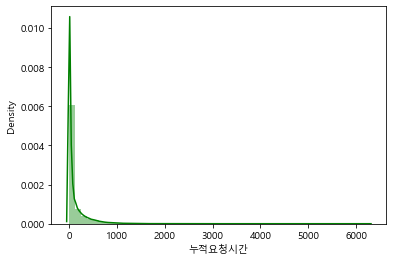

In [31]:
sns.distplot(누적요청시간['누적요청시간'], color='green')

- 그래프가 확연하게 확인되지 않으므로 누적요청시간이 1000 미만의 데이터로만 그래프 구성

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

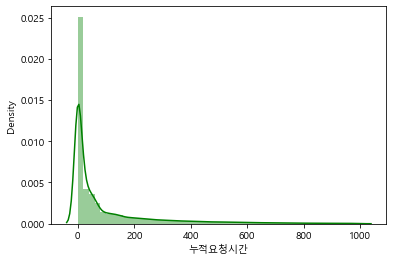

In [32]:
누적요청시간2=누적요청시간[누적요청시간['누적요청시간']<1000]
sns.distplot(누적요청시간2['누적요청시간'], color='green')

- 누적요청시간이 100미만인 데이터로 그래프 시각화

<AxesSubplot:xlabel='누적요청시간', ylabel='Density'>

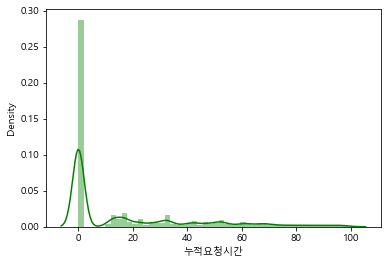

In [33]:
누적요청시간3=누적요청시간[누적요청시간['누적요청시간']<100]
sns.distplot(누적요청시간3['누적요청시간'], color='green')

-> 누적요청시간이 20초 미만에 몰려있는 것을 확인

### 🔗 분석3) 누적요청횟수 시각화(실수요 고객데이터 활용)

### 3-1. 계양

In [34]:
#실수요여부가 1인 데이터만 추출
누적요청횟수=계양[계양['실수요여부']==1][['누적요청횟수']]

- 누적요청횟수 시각화

<BarContainer object of 41 artists>

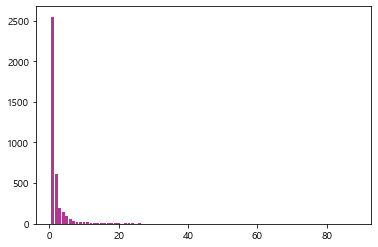

In [35]:
plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, color='#B53691')

- 100미만 누적요청횟수 시각화

<BarContainer object of 41 artists>

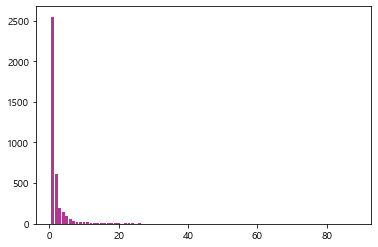

In [36]:
누적요청횟수2=누적요청횟수[누적요청횟수['누적요청횟수']<100]
plt.bar(누적요청횟수2['누적요청횟수'].value_counts().index, 누적요청횟수2['누적요청횟수'].value_counts().values, color='#B53691')

- 20미만 누적요청횟수 시각화

<BarContainer object of 19 artists>

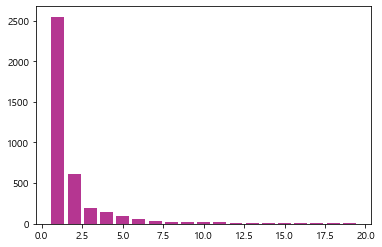

In [37]:
누적요청횟수3=누적요청횟수[누적요청횟수['누적요청횟수']<20]
plt.bar(누적요청횟수3['누적요청횟수'].value_counts().index, 누적요청횟수3['누적요청횟수'].value_counts().values, color='#B53691')

In [38]:
누적=pd.DataFrame(누적요청횟수.value_counts(), columns=['count'])
누적['%']=round(누적['count']/sum(누적['count'])*100,2)
누적.head(5)

,count,%
누적요청횟수,,
1,2547,65.63
2,608,15.67
3,194,5.00
4,142,3.66
5,90,2.32


-> 실제로count를 해보았을 때 1회요청이 2,547명으로 가장 많았고 2회 누적요청이 608명으로 많았다.

-> 반복 요청 없이 1회요청만으로 서비스 사용을 마무리한 사용자는 65.63%  

### 3-2. 검단

In [39]:
#실수요여부가 1인 데이터만 추출
누적요청횟수=검단[검단['실수요여부']==1][['누적요청횟수']]

- 누적요청횟수 시각화

<BarContainer object of 71 artists>

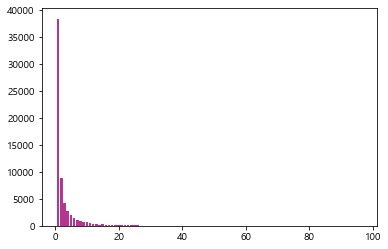

In [40]:
plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, color='#B53691')

- 100미만 누적요청횟수 시각화

<BarContainer object of 71 artists>

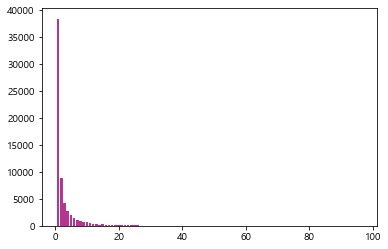

In [41]:
누적요청횟수2=누적요청횟수[누적요청횟수['누적요청횟수']<100]
plt.bar(누적요청횟수2['누적요청횟수'].value_counts().index, 누적요청횟수2['누적요청횟수'].value_counts().values, color='#B53691')

- 20미만 누적요청횟수 시각화

<BarContainer object of 19 artists>

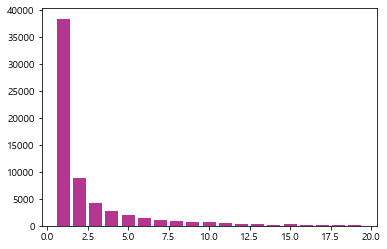

In [42]:
누적요청횟수3=누적요청횟수[누적요청횟수['누적요청횟수']<20]
plt.bar(누적요청횟수3['누적요청횟수'].value_counts().index, 누적요청횟수3['누적요청횟수'].value_counts().values, color='#B53691')

In [43]:
누적=pd.DataFrame(누적요청횟수.value_counts(), columns=['count'])
누적['%']=round(누적['count']/sum(누적['count'])*100,2)
누적.head(5)

,count,%
누적요청횟수,,
1,38387,59.80
2,8835,13.76
3,4294,6.69
4,2725,4.25
5,1966,3.06


-> 실제로count를 해보았을 때 1회요청이 38,387명으로 가장 많았고 2회 누적요청이 8,835명으로 많았다.

-> 반복 요청 없이 1회요청만으로 서비스 사용을 마무리한 사용자는 59.8%  

### 3-3. 송도

In [44]:
#실수요여부가 1인 데이터만 추출
누적요청횟수=송도[송도['실수요여부']==1][['누적요청횟수']]

- 누적요청횟수 시각화

<BarContainer object of 171 artists>

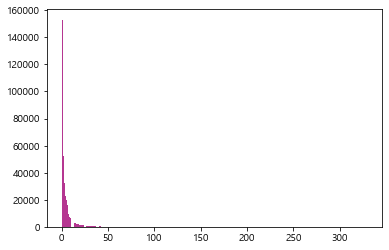

In [45]:
plt.bar(누적요청횟수['누적요청횟수'].value_counts().index, 누적요청횟수['누적요청횟수'].value_counts().values, color='#B53691')

- 100미만 누적요청횟수 시각화

<BarContainer object of 99 artists>

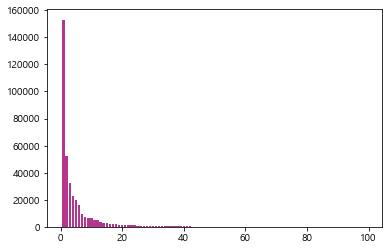

In [46]:
누적요청횟수2=누적요청횟수[누적요청횟수['누적요청횟수']<100]
plt.bar(누적요청횟수2['누적요청횟수'].value_counts().index, 누적요청횟수2['누적요청횟수'].value_counts().values, color='#B53691')

- 20미만 누적요청횟수 시각화

<BarContainer object of 19 artists>

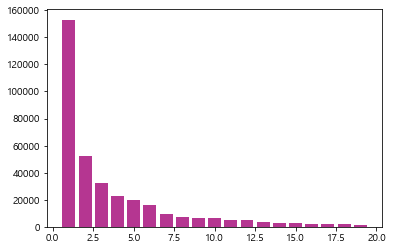

In [47]:
누적요청횟수3=누적요청횟수[누적요청횟수['누적요청횟수']<20]
plt.bar(누적요청횟수3['누적요청횟수'].value_counts().index, 누적요청횟수3['누적요청횟수'].value_counts().values, color='#B53691')

-> 요청횟수가 5이하에 많이 몰려있는 것을 확인

In [48]:
누적=pd.DataFrame(누적요청횟수.value_counts(), columns=['count'])
누적['%']=round(누적['count']/sum(누적['count'])*100,2)
누적

,count,%
누적요청횟수,,
1,153038,41.45
2,52286,14.16
3,32039,8.68
4,23003,6.23
5,19462,5.27
...,...,...
137,1,0.00
135,1,0.00
127,1,0.00


-> 실제로count를 해보았을 때 1회요청이 120,893명으로 가장 많았고 2회 누적요청이 43,982명으로 많았다.

-> 반복 요청 없이 1회요청만으로 서비스 사용을 마무리한 사용자는 38.99%  

### 🔗 분석4) 1회요청만으로 실제 버스를 탑승한 사용자 수(실수요 고객데이터 기준)

In [49]:
#실수요 사용자이면서 누적요청횟수가 1이고 상태가 하차완료인 row를 추출
#row개수 출력
len(df[(df['실수요여부']==1)&(df['누적요청횟수']==1)&(df['상태']=='하차완료')])

112699

-> 분석3에서 확인한 누적요청1회 고객 120,893명 중 62,197명의 고객이 실제 버스 이용완료(약 51%)

In [50]:
100-(62197/120893*100)

48.552025344726324

-> 나머지 약 49%의 사용자는 1회 배차요청후 배차불가나 탑승취소의 이유로 이용하지 못한 후, 승차요청 재시도를 하지 않음을 확인할 수 있음

### 🔗 분석5) 배차대기시간 분포 시각화(실수요 고객+하차완료 고객 기준)
- 배차대기시간 계산 : (승차시간-최초요청시간)으로 최초 버스 승차요청시간부터 실제 승차까지 소요된 시간을 요청대기시간으로 정의

### 5-1. 계양

In [51]:
#실수요고객+하차완료 고객 추출
실수요_하차=계양[(계양['실수요여부']==1)&(계양['상태']=='하차완료')]

#배차대기시간 계산
실수요_하차['대기시간']=실수요_하차['승차시간']-실수요_하차['최초요청시간']

In [52]:
실수요_하차.대기시간.min(), 실수요_하차.대기시간.max()

(Timedelta('0 days 00:00:14'), Timedelta('0 days 00:35:29'))

-> 최소 대기 14초 대기, 최대 대기는 35분 29초 소요인 것을 확인함

In [53]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행하였습니다.
실수요_하차['대기시간']=round((실수요_하차['대기시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['대기시간']=실수요_하차['대기시간'].astype(int)

In [54]:
실수요_하차.head(1)

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간,대기시간
17,계양,계양1호차,하차완료,2021-12-30 14:29:42,계양역,다남식당 방면,목상동솔밭.이주단지입구,목상교차로 방면,2021-12-30 14:38:39,2021-12-30 14:46:13,1,1,0,0,2.42,어른,41357.0,41317.0,17,0.0,1,1,2021-12-30 14:29:42,9


-> 대기시간이 분형식으로 잘 변환된 것을 확인

- 배차대기시간 분포 확인(계양)

<AxesSubplot:xlabel='대기시간'>

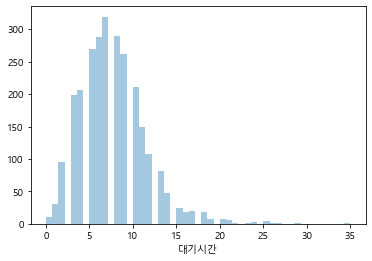

In [55]:
#히스토그램
sns.distplot(실수요_하차['대기시간'], kde=False)

<AxesSubplot:xlabel='대기시간', ylabel='Density'>

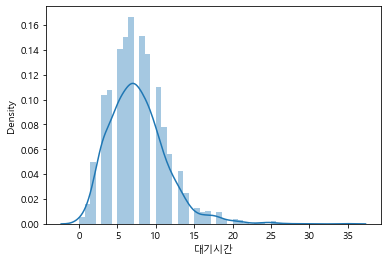

In [56]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['대기시간'])

### 5-2. 검단

In [57]:
#실수요고객+하차완료 고객 추출
실수요_하차=검단[(검단['실수요여부']==1)&(검단['상태']=='하차완료')]

#배차대기시간 계산
실수요_하차['대기시간']=실수요_하차['승차시간']-실수요_하차['최초요청시간']

In [58]:
실수요_하차.대기시간.min(), 실수요_하차.대기시간.max()

(Timedelta('0 days 00:00:15'), Timedelta('0 days 00:57:26'))

-> 최소 대기 15초 대기, 최대 대기는 57분26초 소요인 것을 확인함

In [59]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행하였습니다.
실수요_하차['대기시간']=round((실수요_하차['대기시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['대기시간']=실수요_하차['대기시간'].astype(int)

In [60]:
실수요_하차.head(1)

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간,대기시간
28,검단,검단2호차,하차완료,2021-09-14 14:19:36,참빛감리교회,대우푸르지오방면,아라센트럴파크,검단LH행복주택 방면,2021-09-14 14:41:06,2021-09-14 14:57:33,1,1,0,0,1.51,어른,42437.0,89407.0,28,0.0,1,1,2021-09-14 14:19:36,22


-> 대기시간이 분형식으로 잘 변환된 것을 확인

- 배차대기시간 분포 확인(검단)

<AxesSubplot:xlabel='대기시간'>

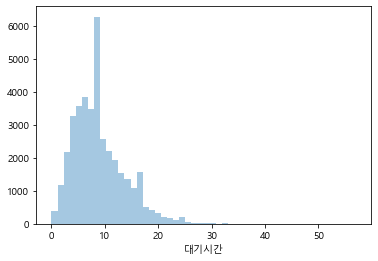

In [61]:
#히스토그램
sns.distplot(실수요_하차['대기시간'], kde=False)

<AxesSubplot:xlabel='대기시간', ylabel='Density'>

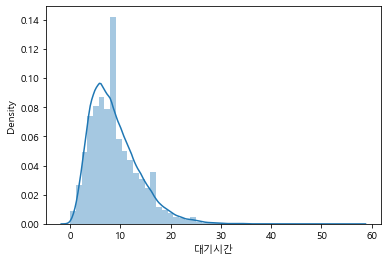

In [62]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['대기시간'])

### 5-3. 송도

In [63]:
#실수요고객+하차완료 고객 추출
실수요_하차=송도[(송도['실수요여부']==1)&(송도['상태']=='하차완료')]

#배차대기시간 계산
실수요_하차['대기시간']=실수요_하차['승차시간']-실수요_하차['최초요청시간']

In [64]:
실수요_하차.대기시간.min(), 실수요_하차.대기시간.max()

(Timedelta('0 days 00:00:15'), Timedelta('0 days 01:44:21'))

-> 최소 대기 15초 대기, 최대 대기는 1시간44분 소요인 것을 확인함

In [65]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행하였습니다.
실수요_하차['대기시간']=round((실수요_하차['대기시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['대기시간']=실수요_하차['대기시간'].astype(int)

In [66]:
실수요_하차.head(1)

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간,대기시간
13,송도,송도6호차,하차완료,2021-12-27 19:13:23,테크노파크역,캠퍼스타운역 방면,송도오션파크베르디움,미송초등학교(하행) 방면,2021-12-27 19:18:34,2021-12-27 19:34:46,2,2,0,0,5.04,어른,38422.0,38642.0,13,0.0,1,1,2021-12-27 19:13:23,5


-> 대기시간이 분형식으로 잘 변환된 것을 확인

- 배차대기시간 분포 확인(송도)

<AxesSubplot:xlabel='대기시간'>

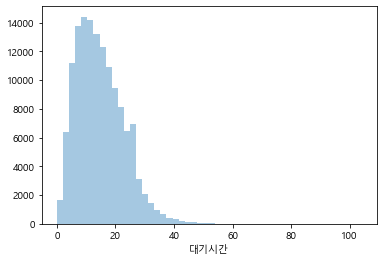

In [67]:
#히스토그램
sns.distplot(실수요_하차['대기시간'], kde=False)

<AxesSubplot:xlabel='대기시간', ylabel='Density'>

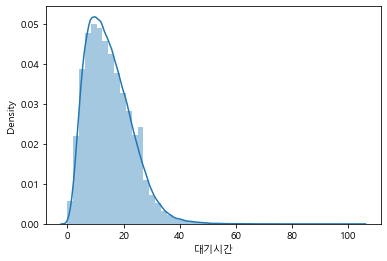

In [68]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['대기시간'])

### 🔗 분석6) 차내 이동시간 시각화
- 이동시간 계산 : (하차시간-승차시간)으로 정의

### 6-1. 계양

In [69]:
#실수요고객+하차완료 고객 추출
실수요_하차=계양[(계양['실수요여부']==1)&(계양['상태']=='하차완료')]

In [70]:
#차내 이동시간 계산
실수요_하차['이동시간']=실수요_하차['하차시간']-실수요_하차['승차시간']

In [71]:
실수요_하차.이동시간.min(), 실수요_하차.이동시간.max()

(Timedelta('0 days 00:00:20'), Timedelta('0 days 00:27:52'))

-> 최소 이동시간 20초, 최대 이동시간은 27분 52초인것을 확인

In [72]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행
실수요_하차['이동시간']=round((실수요_하차['이동시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['이동시간']=실수요_하차['이동시간'].astype(int)

In [73]:
실수요_하차.head(1)

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간,이동시간
17,계양,계양1호차,하차완료,2021-12-30 14:29:42,계양역,다남식당 방면,목상동솔밭.이주단지입구,목상교차로 방면,2021-12-30 14:38:39,2021-12-30 14:46:13,1,1,0,0,2.42,어른,41357.0,41317.0,17,0.0,1,1,2021-12-30 14:29:42,8


-> 이동시간이 분형식으로 잘 변환된 것을 확인

- 차내 이동시간 분포 확인(계양)

<AxesSubplot:xlabel='이동시간'>

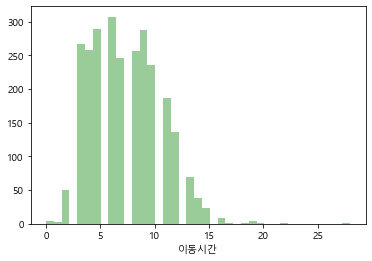

In [74]:
#히스토그램
sns.distplot(실수요_하차['이동시간'], kde=False, color='green')

<AxesSubplot:xlabel='이동시간', ylabel='Density'>

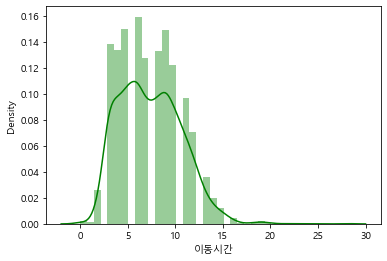

In [75]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['이동시간'], color='green')

### 6-2. 검단

In [76]:
#실수요고객+하차완료 고객 추출
실수요_하차=검단[(검단['실수요여부']==1)&(검단['상태']=='하차완료')]

#차내 이동시간 계산
실수요_하차['이동시간']=실수요_하차['하차시간']-실수요_하차['승차시간']

In [77]:
실수요_하차.이동시간.min(), 실수요_하차.이동시간.max()

(Timedelta('0 days 00:00:01'), Timedelta('0 days 02:52:58'))

-> 최소 이동시간 1초, 최대 이동시간은 2시간 52분 58초 인것을 확인

In [78]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행
실수요_하차['이동시간']=round((실수요_하차['이동시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['이동시간']=실수요_하차['이동시간'].astype(int)

In [79]:
실수요_하차.head(1)

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간,이동시간
28,검단,검단2호차,하차완료,2021-09-14 14:19:36,참빛감리교회,대우푸르지오방면,아라센트럴파크,검단LH행복주택 방면,2021-09-14 14:41:06,2021-09-14 14:57:33,1,1,0,0,1.51,어른,42437.0,89407.0,28,0.0,1,1,2021-09-14 14:19:36,16


-> 이동시간이 분형식으로 잘 변환된 것을 확인

- 차내 이동시간 분포 확인(검단)

<AxesSubplot:xlabel='이동시간'>

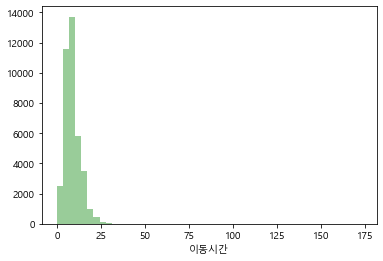

In [80]:
#히스토그램
sns.distplot(실수요_하차['이동시간'], kde=False, color='green')

<AxesSubplot:xlabel='이동시간', ylabel='Density'>

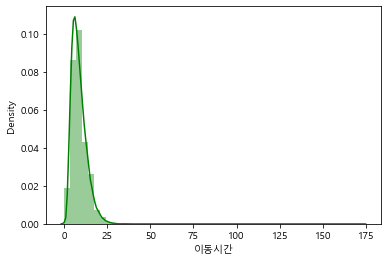

In [81]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['이동시간'], color='green')

### 6-3. 송도

In [82]:
#실수요고객+하차완료 고객 추출
실수요_하차=송도[(송도['실수요여부']==1)&(송도['상태']=='하차완료')]

In [83]:
#차내 이동시간 계산
실수요_하차['이동시간']=실수요_하차['하차시간']-실수요_하차['승차시간']

In [84]:
실수요_하차.이동시간.min(), 실수요_하차.이동시간.max()

(Timedelta('0 days 00:00:01'), Timedelta('0 days 10:33:55'))

-> 최소 이동시간 1초, 최대 이동시간은 10시간 33분 55초인것을 확인

In [85]:
#시간의 차는 timeelta형식이기 때문에 일수 or 초 기준으로만 추출가능
#초형식(dt.seconds)으로 추출 후 60으로 나누어주어 분으로 환산
#계산상 초단위 오차가 발생하여 반올림을 진행
실수요_하차['이동시간']=round((실수요_하차['이동시간'].dt.seconds)/60,0)

#정수형 변환
실수요_하차['이동시간']=실수요_하차['이동시간'].astype(int)

In [86]:
실수요_하차.head(1)

,지역,배차차량,상태,요청시간,승차정류장명,승차정류장방면,하차정류장명,하차정류장방면,승차시간,하차시간,탑승총계,어른,청소년,어린이,거리,회원유형,승차정류장id,하차정류장id,요청식별id,누적요청시간,누적요청횟수,실수요여부,최초요청시간,이동시간
13,송도,송도6호차,하차완료,2021-12-27 19:13:23,테크노파크역,캠퍼스타운역 방면,송도오션파크베르디움,미송초등학교(하행) 방면,2021-12-27 19:18:34,2021-12-27 19:34:46,2,2,0,0,5.04,어른,38422.0,38642.0,13,0.0,1,1,2021-12-27 19:13:23,16


-> 이동시간이 분형식으로 잘 변환된 것을 확인

- 차내 이동시간 분포 확인(송도)

<AxesSubplot:xlabel='이동시간'>

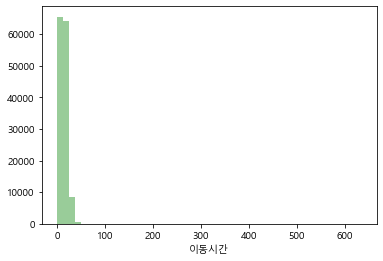

In [87]:
#히스토그램
sns.distplot(실수요_하차['이동시간'], kde=False, color='green')

<AxesSubplot:xlabel='이동시간', ylabel='Density'>

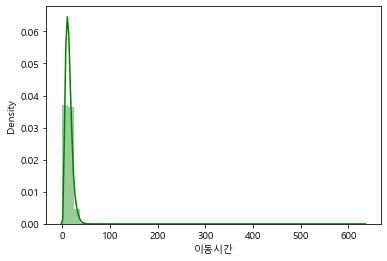

In [88]:
#히스토그램+밀도추정그래프
sns.distplot(실수요_하차['이동시간'], color='green')

- 극단값때문에 파악이 잘되지않으므로 그래프 확대(이동시간이 200(분) 미만인 값)

<AxesSubplot:xlabel='이동시간', ylabel='Density'>

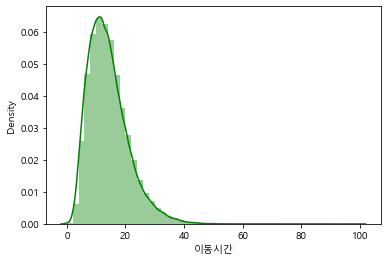

In [89]:
실수요_하차=실수요_하차[실수요_하차['이동시간']<200]
sns.distplot(실수요_하차['이동시간'], color='green')

### 🔗 분석7) 통행시간별 승차수요 시각화(실수요 고객 기준)
- 탑승완료된 사용자가 아니더라도 배차를 시도한 고객은 모두 포함시켜서 시각화

In [90]:
#실수요 고객만 추출
실수요=df[df['실수요여부']==1]

#요청시간 컬럼에서 시간만 추출
실수요['요청시간(시)']=실수요['요청시간'].dt.hour

#시각화에 필요한 컬럼만 남김
실수요=실수요[['지역','요청식별id', '요청시간(시)']]

#시간별 수요 count
시간=pd.DataFrame(실수요.groupby(['지역','요청시간(시)'])['요청식별id'].count())
시간.columns=['count']
시간.reset_index(inplace=True)

#계양에 23시~24시행이 없으므로 그래프 표현을 위한 추가
시간.loc[56] = ['계양', '23', '0']

#요청시간 컬럼 값 수정
시간['요청시간(시)']=시간['요청시간(시)'].astype('str')
시간['요청시간(시)']=['5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '5시-6시', '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시', '13시14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시']

In [91]:
#시간을 인덱스값으로 설정
시간.set_index('요청시간(시)', inplace=True)

In [92]:
시간_계양=시간[시간['지역']=='계양']
시간_검단=시간[시간['지역']=='검단']
시간_송도=시간[시간['지역']=='송도']

- 시간대별 지역별 승차수요

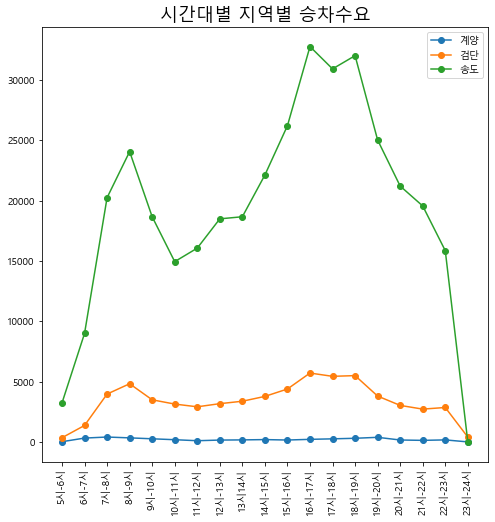

In [93]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(시간_계양.index,시간_계양['count'],marker='o',label='계양') ## 선그래프 생성
ax.plot(시간_계양.index,시간_검단['count'],marker='o',label='검단')
ax.plot(시간_계양.index,시간_송도['count'],marker='o',label='송도')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('시간대별 지역별 승차수요', fontsize=18)

plt.show()

-> 대체로 송도에서 승차 수요 최다  
-> 검단, 송도 지역에서 16시-19시(오후 4시-7시) 수요 급증 패턴

- 그래프를 한번에 표시하면 상대적으로 표본이 다른 지역은 그래프가 잘 확인되지 않으므로 검단, 송도는 개별 그래프 작성

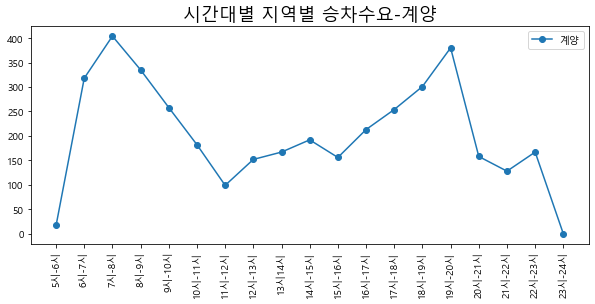

In [94]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(시간_계양.index,시간_계양['count'],marker='o',label='계양')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('시간대별 지역별 승차수요-계양', fontsize=18)

plt.show()

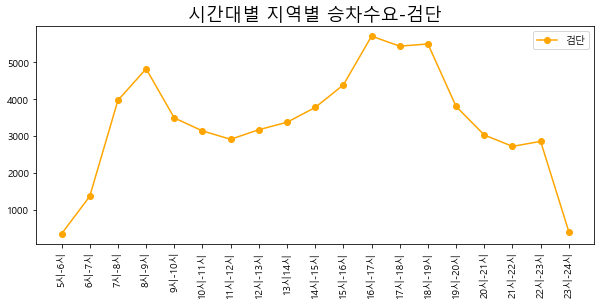

In [95]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(시간_계양.index,시간_검단['count'],marker='o',label='검단', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('시간대별 지역별 승차수요-검단', fontsize=18)

plt.show()

### 🔗 분석8) 월/시간별 상위 10개 정류장만 정류장별 이용수요의 증감 시각화(실수요 고객 기준)

### 8-1. 월별 top10 정류장 수요(계양)

In [96]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=계양[(계양['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#정류장별 수요 count
계양_top=pd.DataFrame(실수요.groupby(['승차정류장id', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
계양_top.columns=['count']

#top10개 추출
계양_top=계양_top.sort_values('count', ascending=False).head(10)
계양_top

,,,count
승차정류장id,승차정류장명,승차정류장방면,
41357,계양역,다남식당 방면,1108
41662,소촌마을,대촌마을 방면,451
41518,인혜학교후문(원욱그린타운),부대앞 방면,254
41510,세농푸드,남씨농원앞 방면,249
41659,계양역(계양중학교 방면),귤현역방면,194
41348,장기동(농협앞),계양1동주민자치센터 방면,183
41509,이화1동회차지,이화동노인정 방면,173
41316,목상동솔밭.이주단지입구,목상동마을입구 방면,141
41516,이화동다리,장기동 방면,136


In [97]:
#top10의 승차정류장id 기준으로 추출
계양_top=실수요[(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==41662)|(실수요['승차정류장id']==41518)|(실수요['승차정류장id']==41510)|(실수요['승차정류장id']==41659)|(실수요['승차정류장id']==41348)|(실수요['승차정류장id']==41509)|(실수요['승차정류장id']==41316)|(실수요['승차정류장id']==41516)|(실수요['승차정류장id']==41512)]

In [98]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
월별수요=pd.DataFrame(계양_top.groupby(['년월', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
월별수요.columns=['count']
월별수요.reset_index(inplace=True)

#년월 컬럼 str로 변환
월별수요['년월']=월별수요['년월'].astype('str')
월별수요

#시간을 인덱스값으로 설정
월별수요.set_index('년월', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=월별수요[월별수요['승차정류장명']=='계양역 ']
정2=월별수요[월별수요['승차정류장명']=='목상동솔밭.이주단지입구 ']
정3=월별수요[월별수요['승차정류장명']=='장기동(농협앞) ']
정4=월별수요[월별수요['승차정류장명']=='계양역(계양중학교 방면) ']
정5=월별수요[월별수요['승차정류장명']=='둑실동(아라마루전망대) ']
정6=월별수요[월별수요['승차정류장명']=='세농푸드 ']
정7=월별수요[월별수요['승차정류장명']=='소촌마을 ']
정8=월별수요[월별수요['승차정류장명']=='이화동다리 ']
정9=월별수요[월별수요['승차정류장명']=='인혜학교후문(원욱그린타운) ']
정10=월별수요[월별수요['승차정류장명']=='이화1동회차지 ']

- 전월대비 증감률 계산

In [99]:
정1['증감']=round(정1['count'].pct_change()*100,2)
정2['증감']=round(정2['count'].pct_change()*100,2)
정3['증감']=round(정3['count'].pct_change()*100,2)
정4['증감']=round(정4['count'].pct_change()*100,2)
정5['증감']=round(정5['count'].pct_change()*100,2)
정6['증감']=round(정6['count'].pct_change()*100,2)
정7['증감']=round(정7['count'].pct_change()*100,2)
정8['증감']=round(정8['count'].pct_change()*100,2)
정9['증감']=round(정9['count'].pct_change()*100,2)
정10['증감']=round(정10['count'].pct_change()*100,2)

정1.fillna(0,inplace=True)
정2.fillna(0,inplace=True)
정3.fillna(0,inplace=True)
정4.fillna(0,inplace=True)
정5.fillna(0,inplace=True)
정6.fillna(0,inplace=True)
정7.fillna(0,inplace=True)
정8.fillna(0,inplace=True)
정9.fillna(0,inplace=True)
정10.fillna(0,inplace=True)

- 시각화

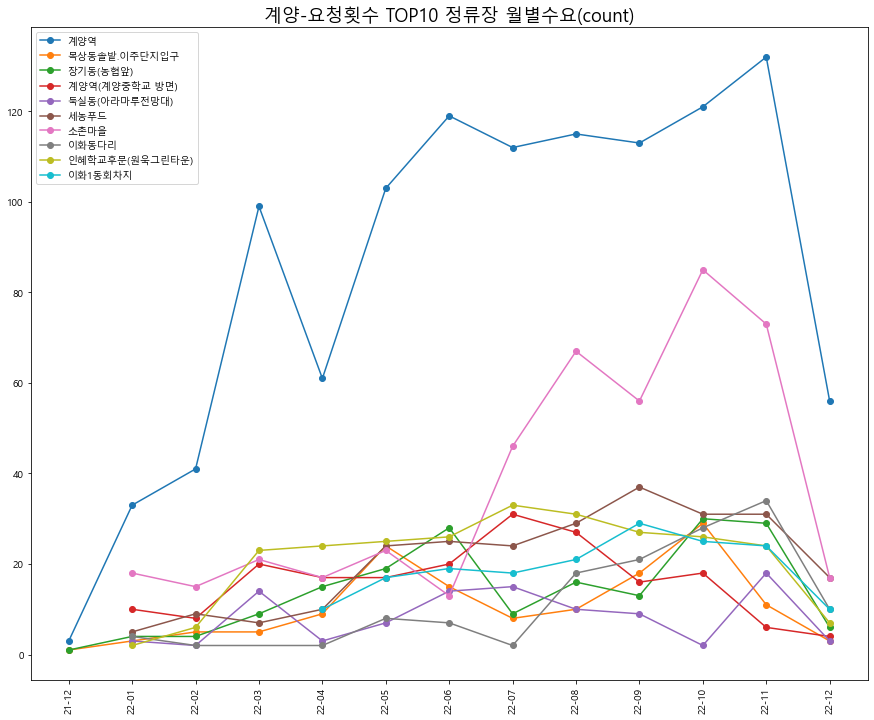

In [100]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정1.index,정1['count'],marker='o',label='계양역') ## 선그래프 생성
ax.plot(정2.index,정2['count'],marker='o',label='목상동솔밭.이주단지입구') 
ax.plot(정3.index,정3['count'],marker='o',label='장기동(농협앞)') 
ax.plot(정4.index,정4['count'],marker='o',label='계양역(계양중학교 방면)') 
ax.plot(정5.index,정5['count'],marker='o',label='둑실동(아라마루전망대)') 
ax.plot(정6.index,정6['count'],marker='o',label='세농푸드') 
ax.plot(정7.index,정7['count'],marker='o',label='소촌마을') 
ax.plot(정8.index,정8['count'],marker='o',label='이화동다리') 
ax.plot(정9.index,정9['count'],marker='o',label='인혜학교후문(원욱그린타운)') 
ax.plot(정10.index,정10['count'],marker='o',label='이화1동회차지') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-요청횟수 TOP10 정류장 월별수요(count)', fontsize=18)

plt.show()

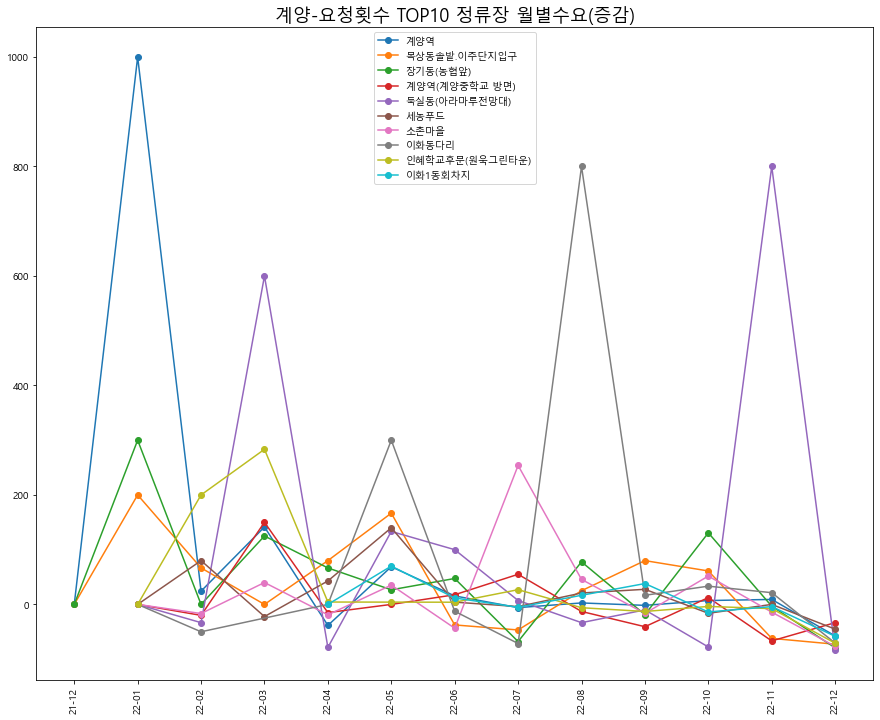

In [101]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정1.index,정1['증감'],marker='o',label='계양역') ## 선그래프 생성
ax.plot(정2.index,정2['증감'],marker='o',label='목상동솔밭.이주단지입구') 
ax.plot(정3.index,정3['증감'],marker='o',label='장기동(농협앞)') 
ax.plot(정4.index,정4['증감'],marker='o',label='계양역(계양중학교 방면)') 
ax.plot(정5.index,정5['증감'],marker='o',label='둑실동(아라마루전망대)') 
ax.plot(정6.index,정6['증감'],marker='o',label='세농푸드') 
ax.plot(정7.index,정7['증감'],marker='o',label='소촌마을') 
ax.plot(정8.index,정8['증감'],marker='o',label='이화동다리') 
ax.plot(정9.index,정9['증감'],marker='o',label='인혜학교후문(원욱그린타운)') 
ax.plot(정10.index,정10['증감'],marker='o',label='이화1동회차지') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-요청횟수 TOP10 정류장 월별수요(증감)', fontsize=18)

plt.show()

### 8-2. 월별 top10 정류장 수요(검단)

In [102]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=검단[(검단['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#정류장별 수요 count
검단_top=pd.DataFrame(실수요.groupby(['승차정류장id', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
검단_top.columns=['count']

#top10개 추출
검단_top=검단_top.sort_values('count', ascending=False).head(10)
검단_top

,,,count
승차정류장id,승차정류장명,승차정류장방면,
42674,완정역,당하동탑스빌아파트 방면,5707
89438,[E] 이음대로.디에트르더펠리체,이음대로.대성베르힐 방면,5267
89408,[F] 검단LH행복주택,오류동마을 방면,3829
42442,보람프라자앞,원당사거리/검단선사박물관방면,3818
89401,아라동행정복지센터,유현사거리 방면,3704
41357,계양역,다남식당 방면,3418
42378,독정역(서구동구예비군훈련장),백석고가(하이마트) 방면,2673
89405,[C] 아라노을공원·한신더휴,서구영어마을 방면,2627
89409,[F] 검단LH행복주택,아라센트럴파크 방면,2328


In [103]:
#top10의 승차정류장id 기준으로 추출
검단_top=실수요[(실수요['승차정류장id']==42674)|(실수요['승차정류장id']==89438)|(실수요['승차정류장id']==89408)|(실수요['승차정류장id']==42442)|(실수요['승차정류장id']==89401)|(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==42378)|(실수요['승차정류장id']==89405)|(실수요['승차정류장id']==89409)|(실수요['승차정류장id']==89411)]

In [104]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
월별수요=pd.DataFrame(검단_top.groupby(['년월', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
월별수요.columns=['count']
월별수요.reset_index(inplace=True)

#년월 컬럼 str로 변환
월별수요['년월']=월별수요['년월'].astype('str')
월별수요

#시간을 인덱스값으로 설정
월별수요.set_index('년월', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=월별수요[월별수요['승차정류장명']=='완정역 ']
정2=월별수요[월별수요['승차정류장명']=='[E] 이음대로.디에트르더펠리체 ']
정3=월별수요[월별수요['승차정류장방면']=='오류동마을 방면']
정4=월별수요[월별수요['승차정류장명']=='보람프라자앞 ']
정5=월별수요[월별수요['승차정류장명']=='아라동행정복지센터 ']
정6=월별수요[월별수요['승차정류장명']=='계양역 ']
정7=월별수요[월별수요['승차정류장명']=='독정역(서구동구예비군훈련장) ']
정8=월별수요[월별수요['승차정류장명']=='[C] 아라노을공원·한신더휴 ']
정9=월별수요[월별수요['승차정류장방면']=='아라센트럴파크 방면']
정10=월별수요[월별수요['승차정류장명']=='[D] 인천해든초등학교 ']

- 시각화

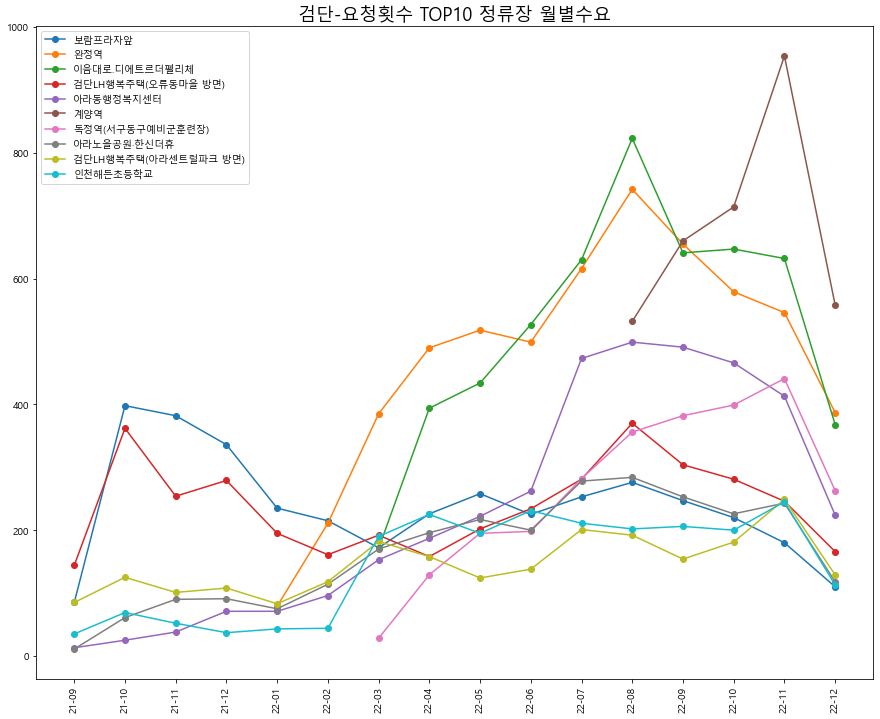

In [105]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정4.index,정4['count'],marker='o',label='보람프라자앞') ## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='완정역') 
ax.plot(정2.index,정2['count'],marker='o',label='이음대로.디에트르더펠리체') 
ax.plot(정3.index,정3['count'],marker='o',label='검단LH행복주택(오류동마을 방면)') 
ax.plot(정5.index,정5['count'],marker='o',label='아라동행정복지센터') 
ax.plot(정6.index,정6['count'],marker='o',label='계양역') 
ax.plot(정7.index,정7['count'],marker='o',label='독정역(서구동구예비군훈련장)') 
ax.plot(정8.index,정8['count'],marker='o',label='아라노을공원·한신더휴') 
ax.plot(정9.index,정9['count'],marker='o',label='검단LH행복주택(아라센트럴파크 방면)') 
ax.plot(정10.index,정10['count'],marker='o',label='인천해든초등학교') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('검단-요청횟수 TOP10 정류장 월별수요', fontsize=18)

plt.show()

### 8-3. 월별 top10 정류장 수요(송도)

In [106]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=송도[(송도['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

실수요[실수요['승차정류장id'].isnull()].head(3)
#승차정류장 = "더샵송도마리나베이아파트후문 ","더샵송도마리나베이아파트후문"일 경우 승차정류장id가 부여되어있지 않음을 확인

#정류장명 통일
실수요.replace("더샵송도마리나베이아파트후문 ", "더샵송도마리나베이아파트후문", inplace=True)

In [107]:
#null값에 임의값 채움
실수요['승차정류장id'].fillna(99999, inplace=True)

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#정류장별 수요 count
송도_top=pd.DataFrame(실수요.groupby(['승차정류장id', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
송도_top.columns=['count']

#top10개 추출
송도_top=송도_top.sort_values('count', ascending=False).head(10)
송도_top

,,,count
승차정류장id,승차정류장명,승차정류장방면,
38624,e편한세상 정문,랜드마크시티센트럴더샵(106동) 방면,14573
99999,더샵송도마리나베이아파트후문,힐스테이트레이크송도2차 방면,11614
38422,테크노파크역,캠퍼스타운역 방면,8480
38665,랜드마크시티센트럴더샵(106동),송도호반베르디움3차에듀시티 방면,8443
38654,미송초등학교,e편한세상정문 방면,8387
38715,힐스테이트송도더테라스(정문),달빛축제공원 방면,7907
38411,해양경찰청,이안송도 방면,7634
38696,송도달빛축제공원역,힐스테이트송도더테라스(후문) 방면,7533
38734,달빛축제공원대공연장,달빛축제공원 방면,7499


In [108]:
#top10의 승차정류장id 기준으로 추출
송도_top=실수요[(실수요['승차정류장id']==38624)|(실수요['승차정류장id']==99999)|(실수요['승차정류장id']==38422)|(실수요['승차정류장id']==38665)|(실수요['승차정류장id']==38654)|(실수요['승차정류장id']==38715)|(실수요['승차정류장id']==38411)|(실수요['승차정류장id']==38696)|(실수요['승차정류장id']==38734)|(실수요['승차정류장id']==38650)]

In [109]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
월별수요=pd.DataFrame(송도_top.groupby(['년월', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
월별수요.columns=['count']
월별수요.reset_index(inplace=True)

#년월 컬럼 str로 변환
월별수요['년월']=월별수요['년월'].astype('str')
월별수요

#시간을 인덱스값으로 설정
월별수요.set_index('년월', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=월별수요[월별수요['승차정류장명']=='e편한세상 정문 ']
정2=월별수요[월별수요['승차정류장명']=='더샵송도마리나베이아파트후문']
정3=월별수요[월별수요['승차정류장방면']=='랜드마크시티센트럴더샵(106동) ']
정4=월별수요[월별수요['승차정류장명']=='미송초등학교 ']
정5=월별수요[월별수요['승차정류장명']=='송도달빛축제공원역 ']
정6=월별수요[월별수요['승차정류장명']=='해양경찰청 ']
정7=월별수요[월별수요['승차정류장명']=='힐스테이트송도더테라스(정문) ']
정8=월별수요[월별수요['승차정류장명']=='랜드마크시티센트럴더샵(203동) ']
정9=월별수요[월별수요['승차정류장방면']=='달빛축제공원대공연장 ']
정10=월별수요[월별수요['승차정류장명']=='테크노파크역 ']

- 시각화

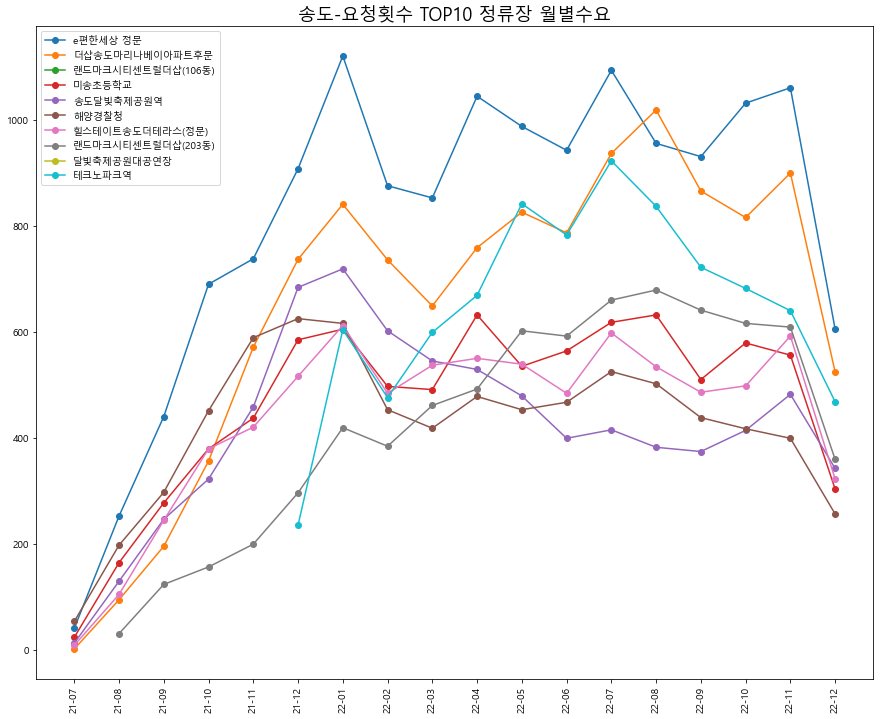

In [110]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

 ## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='e편한세상 정문') 
ax.plot(정2.index,정2['count'],marker='o',label='더샵송도마리나베이아파트후문') 
ax.plot(정3.index,정3['count'],marker='o',label='랜드마크시티센트럴더샵(106동)') 
ax.plot(정4.index,정4['count'],marker='o',label='미송초등학교')
ax.plot(정5.index,정5['count'],marker='o',label='송도달빛축제공원역') 
ax.plot(정6.index,정6['count'],marker='o',label='해양경찰청') 
ax.plot(정7.index,정7['count'],marker='o',label='힐스테이트송도더테라스(정문)') 
ax.plot(정8.index,정8['count'],marker='o',label='랜드마크시티센트럴더샵(203동)') 
ax.plot(정9.index,정9['count'],marker='o',label='달빛축제공원대공연장') 
ax.plot(정10.index,정10['count'],marker='o',label='테크노파크역') 

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-요청횟수 TOP10 정류장 월별수요', fontsize=18)

plt.show()

### 8-4. 시간대별 top10 정류장 수요(계양)

In [111]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=계양[(계양['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#top10의 승차정류장id 기준으로 추출
계양_top=실수요[(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==41662)|(실수요['승차정류장id']==41518)|(실수요['승차정류장id']==41510)|(실수요['승차정류장id']==41659)|(실수요['승차정류장id']==41348)|(실수요['승차정류장id']==41509)|(실수요['승차정류장id']==41316)|(실수요['승차정류장id']==41516)|(실수요['승차정류장id']==41512)]

In [112]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
시간대별=pd.DataFrame(계양_top.groupby(['시', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
시간대별.columns=['count']
시간대별.reset_index(inplace=True)

#년월 컬럼 str로 변환
시간대별['시']=시간대별['시'].astype('str')
시간대별

#시간을 인덱스값으로 설정
시간대별.set_index('시', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=시간대별[시간대별['승차정류장명']=='계양역 ']
정2=시간대별[시간대별['승차정류장명']=='목상동솔밭.이주단지입구 ']
정3=시간대별[시간대별['승차정류장명']=='장기동(농협앞) ']
정4=시간대별[시간대별['승차정류장명']=='계양역(계양중학교 방면) ']
정5=시간대별[시간대별['승차정류장명']=='둑실동(아라마루전망대) ']
정6=시간대별[시간대별['승차정류장명']=='세농푸드 ']
정7=시간대별[시간대별['승차정류장명']=='소촌마을 ']
정8=시간대별[시간대별['승차정류장명']=='이화동다리 ']
정9=시간대별[시간대별['승차정류장명']=='인혜학교후문(원욱그린타운) ']
정10=시간대별[시간대별['승차정류장명']=='이화1동회차지 ']

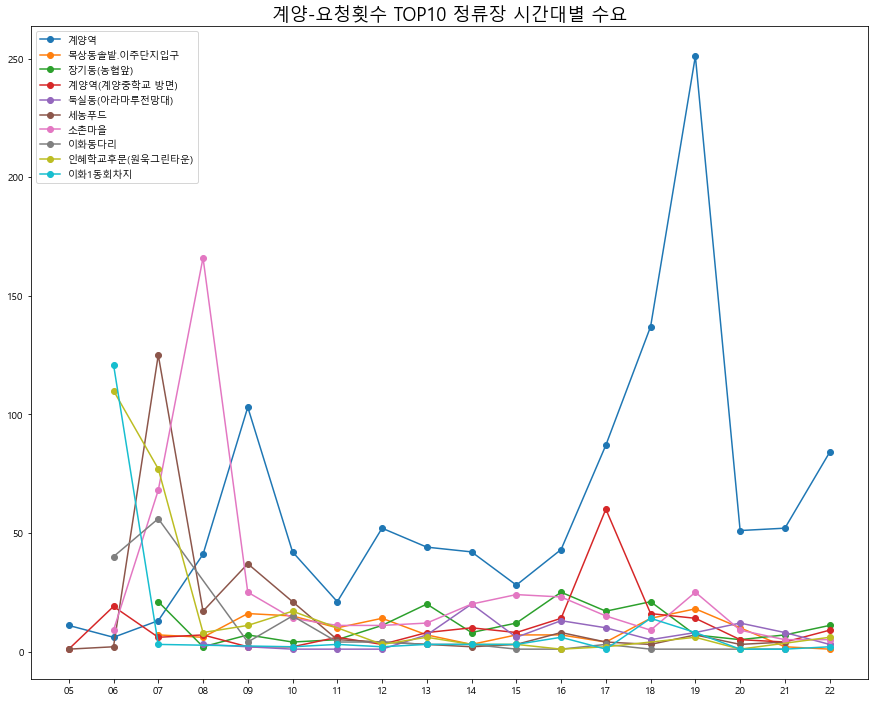

In [113]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(정1.index,정1['count'],marker='o',label='계양역') ## 선그래프 생성
ax.plot(정2.index,정2['count'],marker='o',label='목상동솔밭.이주단지입구') 
ax.plot(정3.index,정3['count'],marker='o',label='장기동(농협앞)') 
ax.plot(정4.index,정4['count'],marker='o',label='계양역(계양중학교 방면)') 
ax.plot(정5.index,정5['count'],marker='o',label='둑실동(아라마루전망대)') 
ax.plot(정6.index,정6['count'],marker='o',label='세농푸드') 
ax.plot(정7.index,정7['count'],marker='o',label='소촌마을') 
ax.plot(정8.index,정8['count'],marker='o',label='이화동다리') 
ax.plot(정9.index,정9['count'],marker='o',label='인혜학교후문(원욱그린타운)') 
ax.plot(정10.index,정10['count'],marker='o',label='이화1동회차지') 

ax.legend() ## 범례


#그래프 제목 지정
plt.title('계양-요청횟수 TOP10 정류장 시간대별 수요', fontsize=18)

plt.show()

### 8-5. 시간대별 top10 정류장 수요(검단)

In [114]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=검단[(검단['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#top10의 승차정류장id 기준으로 추출
검단_top=실수요[(실수요['승차정류장id']==42674)|(실수요['승차정류장id']==89438)|(실수요['승차정류장id']==89408)|(실수요['승차정류장id']==42442)|(실수요['승차정류장id']==89401)|(실수요['승차정류장id']==41357)|(실수요['승차정류장id']==42378)|(실수요['승차정류장id']==89405)|(실수요['승차정류장id']==89409)|(실수요['승차정류장id']==89411)]

In [115]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
시간대별=pd.DataFrame(검단_top.groupby(['시', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
시간대별.columns=['count']
시간대별.reset_index(inplace=True)

#년월 컬럼 str로 변환
시간대별['시']=시간대별['시'].astype('str')
시간대별

#시간을 인덱스값으로 설정
시간대별.set_index('시', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=시간대별[시간대별['승차정류장명']=='완정역 ']
정2=시간대별[시간대별['승차정류장명']=='[E] 이음대로.디에트르더펠리체 ']
정3=시간대별[시간대별['승차정류장방면']=='오류동마을 방면']
정4=시간대별[시간대별['승차정류장명']=='보람프라자앞 ']
정5=시간대별[시간대별['승차정류장명']=='아라동행정복지센터 ']
정6=시간대별[시간대별['승차정류장명']=='계양역 ']
정7=시간대별[시간대별['승차정류장명']=='독정역(서구동구예비군훈련장) ']
정8=시간대별[시간대별['승차정류장명']=='[C] 아라노을공원·한신더휴 ']
정9=시간대별[시간대별['승차정류장방면']=='아라센트럴파크 방면']
정10=시간대별[시간대별['승차정류장명']=='[D] 인천해든초등학교 ']

- 시각화

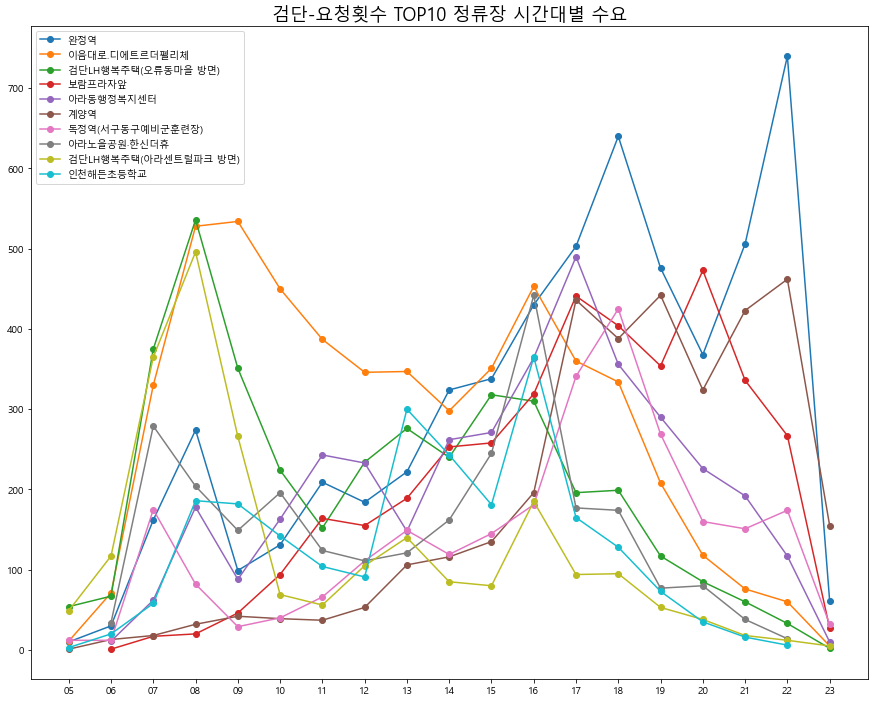

In [116]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='완정역') 
ax.plot(정2.index,정2['count'],marker='o',label='이음대로.디에트르더펠리체') 
ax.plot(정3.index,정3['count'],marker='o',label='검단LH행복주택(오류동마을 방면)') 
ax.plot(정4.index,정4['count'],marker='o',label='보람프라자앞') 
ax.plot(정5.index,정5['count'],marker='o',label='아라동행정복지센터') 
ax.plot(정6.index,정6['count'],marker='o',label='계양역') 
ax.plot(정7.index,정7['count'],marker='o',label='독정역(서구동구예비군훈련장)') 
ax.plot(정8.index,정8['count'],marker='o',label='아라노을공원·한신더휴') 
ax.plot(정9.index,정9['count'],marker='o',label='검단LH행복주택(아라센트럴파크 방면)') 
ax.plot(정10.index,정10['count'],marker='o',label='인천해든초등학교') 

ax.legend() ## 범례


#그래프 제목 지정
plt.title('검단-요청횟수 TOP10 정류장 시간대별 수요', fontsize=18)

plt.show()

### 8-6. 시간대별 top10 정류장 수요(송도)

In [117]:
#실수요여부가 1이면서 분석에 필요한 데이터 저장
실수요=송도[(송도['실수요여부']==1)][['요청시간', '승차정류장명', '승차정류장방면', '승차정류장id', '요청식별id']]

실수요[실수요['승차정류장id'].isnull()].head(3)
#승차정류장 = "더샵송도마리나베이아파트후문 ","더샵송도마리나베이아파트후문"일 경우 승차정류장id가 부여되어있지 않음을 확인

#정류장명 통일
실수요.replace("더샵송도마리나베이아파트후문 ", "더샵송도마리나베이아파트후문", inplace=True)

#null값에 임의값 채움
실수요['승차정류장id'].fillna(99999, inplace=True)

#승차정류장id 정수변환
실수요['승차정류장id']=실수요['승차정류장id'].astype(int)

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

In [118]:
#top10의 승차정류장id 기준으로 추출
송도_top=실수요[(실수요['승차정류장id']==38624)|(실수요['승차정류장id']==99999)|(실수요['승차정류장id']==38422)|(실수요['승차정류장id']==38665)|(실수요['승차정류장id']==38654)|(실수요['승차정류장id']==38715)|(실수요['승차정류장id']==38411)|(실수요['승차정류장id']==38696)|(실수요['승차정류장id']==38734)|(실수요['승차정류장id']==38650)]

In [119]:
#년월, 승차정류장명, 승차정류장방면으로 수요 count
시간대별=pd.DataFrame(송도_top.groupby(['시', '승차정류장명', '승차정류장방면'])['요청식별id'].count())
시간대별.columns=['count']
시간대별.reset_index(inplace=True)

#년월 컬럼 str로 변환
시간대별['시']=시간대별['시'].astype('str')
시간대별

#시간을 인덱스값으로 설정
시간대별.set_index('시', inplace=True)

#각각의 정류장 저장(선그래프 하나에 할당하는 정류장)
정1=시간대별[시간대별['승차정류장명']=='e편한세상 정문 ']
정2=시간대별[시간대별['승차정류장명']=='더샵송도마리나베이아파트후문']
정3=시간대별[시간대별['승차정류장방면']=='랜드마크시티센트럴더샵(106동) ']
정4=시간대별[시간대별['승차정류장명']=='미송초등학교 ']
정5=시간대별[시간대별['승차정류장명']=='송도달빛축제공원역 ']
정6=시간대별[시간대별['승차정류장명']=='해양경찰청 ']
정7=시간대별[시간대별['승차정류장명']=='힐스테이트송도더테라스(정문) ']
정8=시간대별[시간대별['승차정류장명']=='랜드마크시티센트럴더샵(203동) ']
정9=시간대별[시간대별['승차정류장방면']=='달빛축제공원대공연장 ']
정10=시간대별[시간대별['승차정류장명']=='테크노파크역 ']

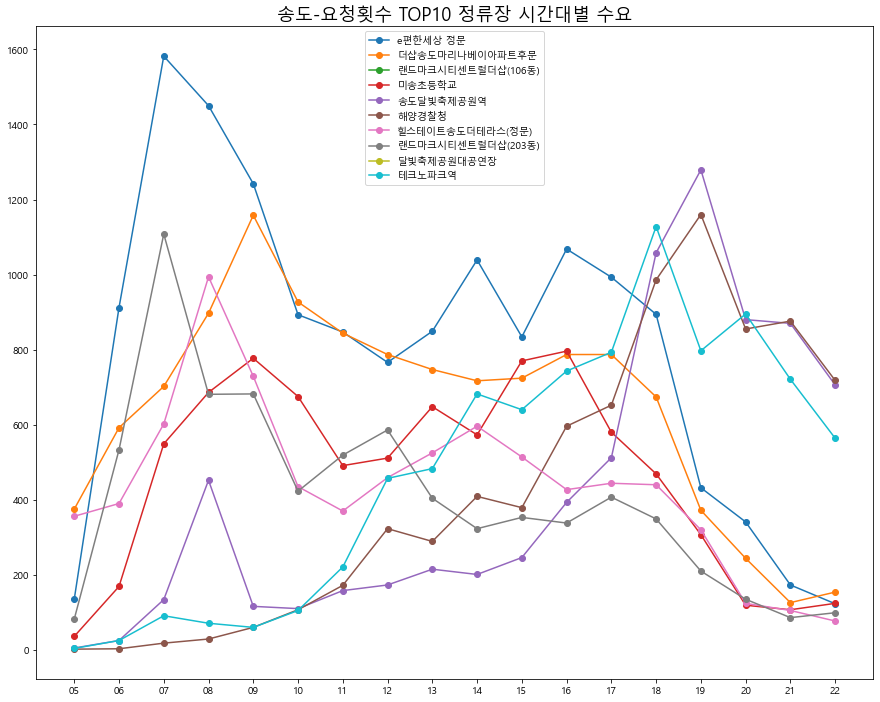

In [120]:
fig = plt.figure(figsize=(15,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

 ## 선그래프 생성
ax.plot(정1.index,정1['count'],marker='o',label='e편한세상 정문') 
ax.plot(정2.index,정2['count'],marker='o',label='더샵송도마리나베이아파트후문') 
ax.plot(정3.index,정3['count'],marker='o',label='랜드마크시티센트럴더샵(106동)') 
ax.plot(정4.index,정4['count'],marker='o',label='미송초등학교')
ax.plot(정5.index,정5['count'],marker='o',label='송도달빛축제공원역') 
ax.plot(정6.index,정6['count'],marker='o',label='해양경찰청') 
ax.plot(정7.index,정7['count'],marker='o',label='힐스테이트송도더테라스(정문)') 
ax.plot(정8.index,정8['count'],marker='o',label='랜드마크시티센트럴더샵(203동)') 
ax.plot(정9.index,정9['count'],marker='o',label='달빛축제공원대공연장') 
ax.plot(정10.index,정10['count'],marker='o',label='테크노파크역') 

ax.legend() ## 범례

#그래프 제목 지정
plt.title('송도-요청횟수 TOP10 정류장 시간대별 수요', fontsize=18)

plt.show()

### 🔗 분석9) 지역별 전월대비 증감률(실수요 기준)

### 9-1. 계양

In [121]:
실수요_계양=계양[계양['실수요여부']==1]

#요청시간에서 년월만 추출
실수요_계양['년월']=실수요_계양['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 컬럼만 저장
실수요_계양[['년월', '요청식별id']].head(5)

,년월,요청식별id
0,22-05,0
1,22-05,1
6,22-10,6
15,21-12,15
16,21-12,16


In [122]:
#월별 count 계산
월별=pd.DataFrame(실수요_계양.groupby('년월')['요청식별id'].count())
월별.columns=['count']

#증감률 계산
월별['증감률']=round(월별['count'].pct_change()*100,2)
월별.fillna(0, inplace=True)
월별

,count,증감률
년월,,
21-12,19,0.00
22-01,120,531.58
22-02,148,23.33
22-03,270,82.43
22-04,221,-18.15
22-05,348,57.47
22-06,379,8.91
22-07,392,3.43
22-08,420,7.14


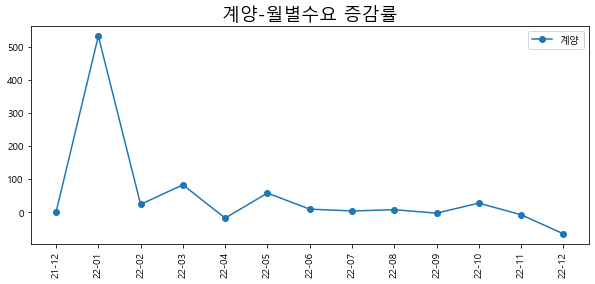

In [123]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(월별.index,월별['증감률'],marker='o',label='계양')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-월별수요 증감률', fontsize=18)

plt.show()

### 9-2. 검단

In [124]:
실수요_검단=검단[검단['실수요여부']==1]

#요청시간에서 년월만 추출
실수요_검단['년월']=실수요_검단['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 컬럼만 저장
실수요_검단[['년월', '요청식별id']].head(5)

,년월,요청식별id
2,22-08,2
3,22-10,3
4,22-10,4
5,22-10,5
9,22-12,7


In [125]:
#월별 count 계산
월별=pd.DataFrame(실수요_검단.groupby('년월')['요청식별id'].count())
월별.columns=['count']

#증감률 계산
월별['증감률']=round(월별['count'].pct_change()*100,2)
월별.fillna(0, inplace=True)
월별

,count,증감률
년월,,
21-09,689,0.00
21-10,1923,179.10
21-11,1980,2.96
21-12,1813,-8.43
22-01,1396,-23.00
22-02,1651,18.27
22-03,2843,72.20
22-04,3754,32.04
22-05,4173,11.16


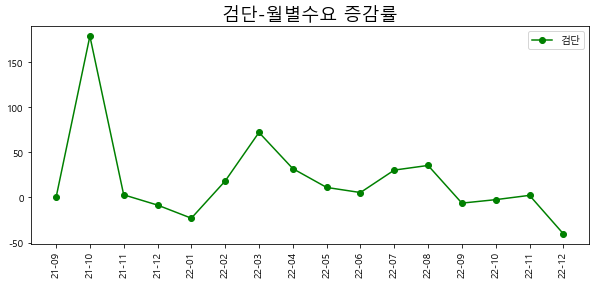

In [126]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(월별.index,월별['증감률'],marker='o',label='검단', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('검단-월별수요 증감률', fontsize=18)

plt.show()

### 9-3. 송도

In [127]:
실수요_송도=송도[송도['실수요여부']==1]

#요청시간에서 년월만 추출
실수요_송도['년월']=실수요_송도['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 컬럼만 저장
실수요_송도[['년월', '요청식별id']].head(5)

,년월,요청식별id
10,21-12,10
12,21-12,11
13,21-12,13
14,21-12,14
25,22-05,22


In [128]:
#월별 count 계산
월별=pd.DataFrame(실수요_송도.groupby('년월')['요청식별id'].count())
월별.columns=['count']

#증감률 계산
월별['증감률']=round(월별['count'].pct_change()*100,2)
월별.fillna(0, inplace=True)
월별

,count,증감률
년월,,
21-07,849,0.00
21-08,4916,479.03
21-09,8268,68.19
21-10,11979,44.88
21-11,14372,19.98
21-12,18742,30.41
22-01,24272,29.51
22-02,20647,-14.93
22-03,24163,17.03


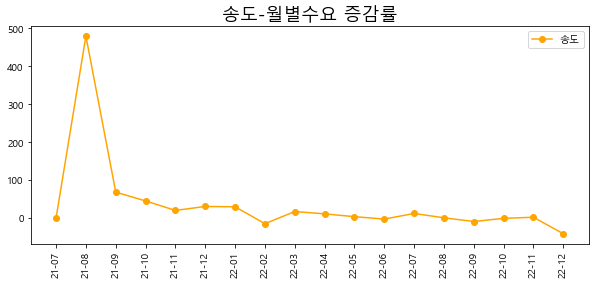

In [129]:
#x축으로 지정할 컬럼 'time'에 저장

fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(월별.index,월별['증감률'],marker='o',label='송도', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-월별수요 증감률', fontsize=18)

plt.show()

### 🔗 분석10) 연령대별(어른, 청소년, 어린이) 월별/시간대별 수요(실수요 고객 기준)
- 월별 수요 : 계절성 파악  
- 시간대별 수요 : 출퇴근, 등하교 시간의 특성 파악 

### 10-1. 연령대별 월별 수요(계양)

In [130]:
#실수요 추출
실수요=계양[계양['실수요여부']==1] 

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '년월']]

In [131]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('년월')['어른', '청소년', '어린이'].sum()
실수요

,어른,청소년,어린이
년월,,,
21-12,19,0,0
22-01,116,7,15
22-02,155,6,5
22-03,302,6,11
22-04,234,6,17
22-05,351,10,21
22-06,397,11,18
22-07,421,7,36
22-08,442,1,31


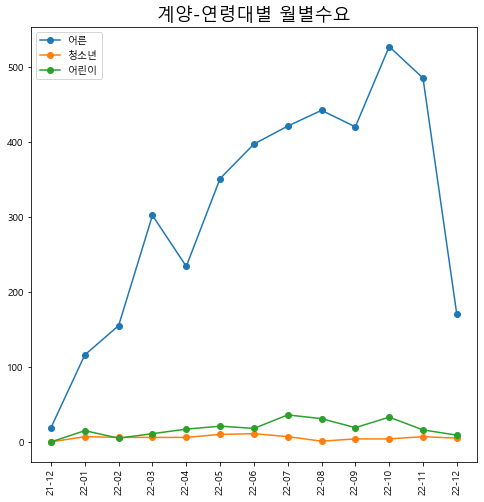

In [132]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-연령대별 월별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

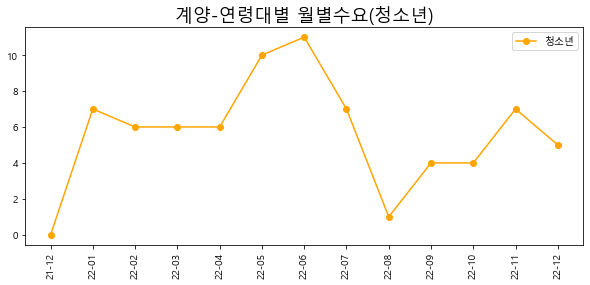

In [133]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-연령대별 월별수요(청소년)', fontsize=18)

plt.show()

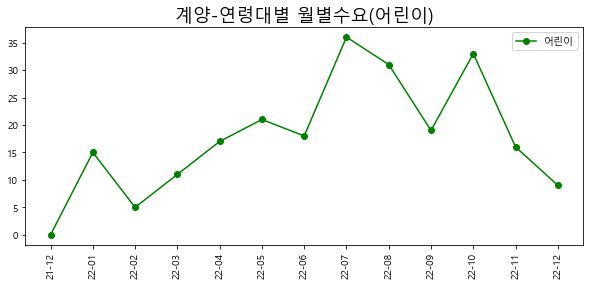

In [134]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('계양-연령대별 월별수요(어린이)', fontsize=18)

plt.show()

### 10-2. 연령대별 시간대별 수요(계양)

In [135]:
#실수요 추출
실수요=계양[계양['실수요여부']==1] 

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '시']]

In [136]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('시')['어른', '청소년', '어린이'].sum()
실수요

,어른,청소년,어린이
시,,,
05,17,0,0
06,319,1,0
07,411,3,2
08,333,3,56
09,270,4,12
10,189,2,10
11,101,3,7
12,170,1,7
13,164,4,19


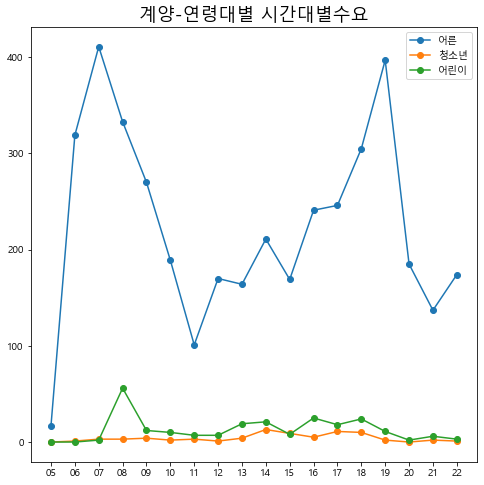

In [137]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#그래프 제목 지정
plt.title('계양-연령대별 시간대별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

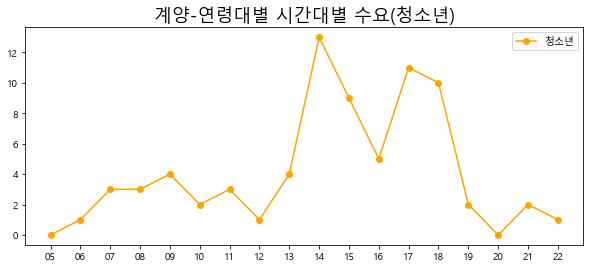

In [138]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#그래프 제목 지정
plt.title('계양-연령대별 시간대별 수요(청소년)', fontsize=18)

plt.show()

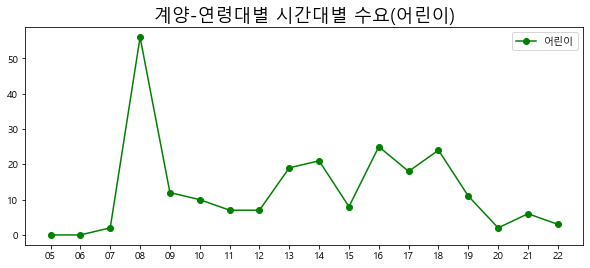

In [139]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례


#그래프 제목 지정
plt.title('계양-연령대별 시간대별 수요(어린이)', fontsize=18)

plt.show()

### 10-3. 연령대별 월별 수요(검단)

In [140]:
#실수요 추출
실수요=검단[검단['실수요여부']==1] 

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '년월']]

In [141]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('년월')['어른', '청소년', '어린이'].sum()
실수요

,어른,청소년,어린이
년월,,,
21-09,749,29,69
21-10,1776,325,176
21-11,1618,489,218
21-12,1529,381,173
22-01,1156,308,186
22-02,1366,407,179
22-03,2383,644,219
22-04,2952,1020,392
22-05,3412,1066,383


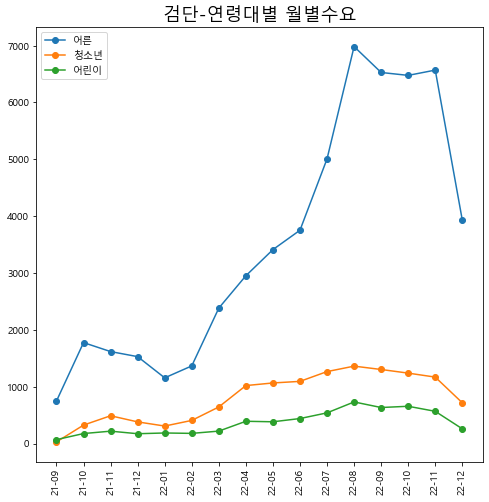

In [142]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('검단-연령대별 월별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

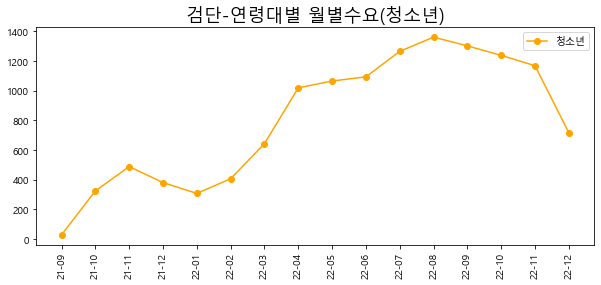

In [143]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('검단-연령대별 월별수요(청소년)', fontsize=18)

plt.show()

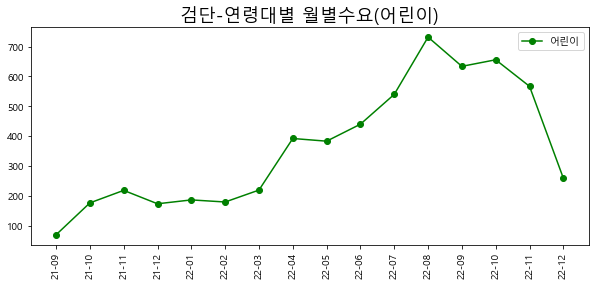

In [144]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('검단-연령대별 월별수요(어린이)', fontsize=18)

plt.show()

### 10-4. 연령대별 시간대별 수요(검단)

In [145]:
#실수요 추출
실수요=검단[검단['실수요여부']==1] 

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '시']]

In [146]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('시')['어른', '청소년', '어린이'].sum()
실수요

,어른,청소년,어린이
시,,,
05,348,1,0
06,1332,72,3
07,3406,636,39
08,4084,905,351
09,3366,316,193
10,3002,299,240
11,2779,362,223
12,2848,552,268
13,3110,537,359


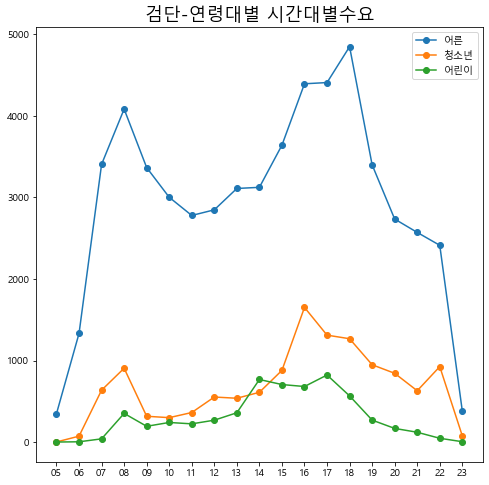

In [147]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#그래프 제목 지정
plt.title('검단-연령대별 시간대별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

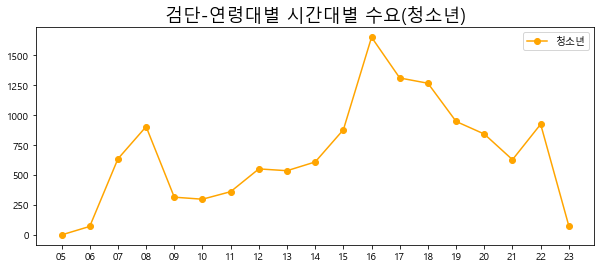

In [148]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#그래프 제목 지정
plt.title('검단-연령대별 시간대별 수요(청소년)', fontsize=18)

plt.show()

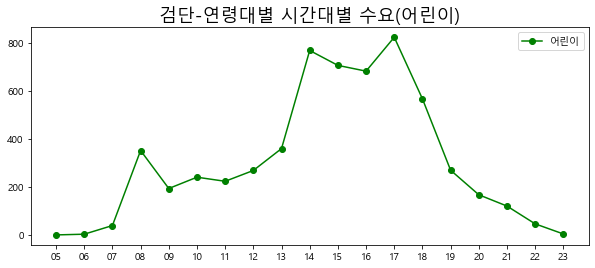

In [149]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례


#그래프 제목 지정
plt.title('검단-연령대별 시간대별 수요(어린이)', fontsize=18)

plt.show()

### 10-5. 연령대별 월별 수요(송도)

In [150]:
#실수요 추출
실수요=송도[송도['실수요여부']==1] 

#요청시간에서 년월만 추출
실수요['년월']=실수요['요청시간'].dt.strftime('%Y-%m').str[2:]

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '년월']]

In [151]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('년월')['어른', '청소년', '어린이'].sum()
실수요

,어른,청소년,어린이
년월,,,
21-07,587,113,253
21-08,4001,1070,530
21-09,6620,1968,799
21-10,9426,3005,1048
21-11,11147,3600,1154
21-12,14579,4854,1233
22-01,19071,6284,1410
22-02,16455,5178,1167
22-03,19522,5672,1458


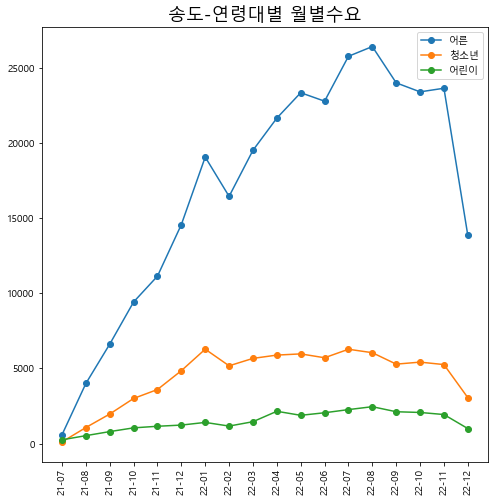

In [152]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-연령대별 월별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

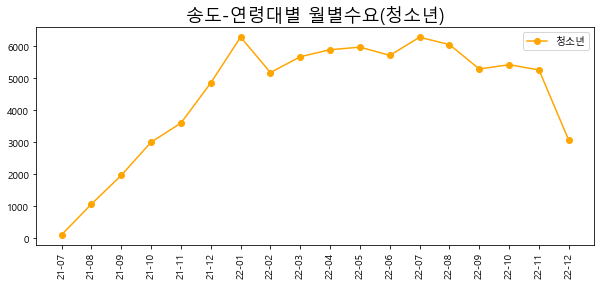

In [153]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-연령대별 월별수요(청소년)', fontsize=18)

plt.show()

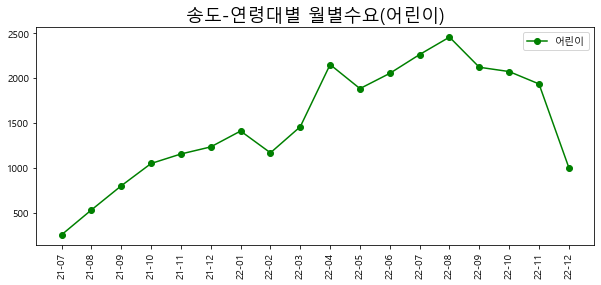

In [154]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례

#x축 레이블 회전
plt.xticks(rotation=90)

#그래프 제목 지정
plt.title('송도-연령대별 월별수요(어린이)', fontsize=18)

plt.show()

### 10-6. 연령대별 시간대별 수요(송도)

In [155]:
#실수요 추출
실수요=송도[송도['실수요여부']==1] 

#요청시간에서 시간만 추출
실수요['시']=실수요['요청시간'].dt.strftime('%H')

#필요한 열만 추출
실수요=실수요[['어른', '청소년', '어린이', '요청식별id', '시']]

In [156]:
#월별-어른, 청소년, 어린이 탑승 수요 집계
실수요=실수요.groupby('시')['어른', '청소년', '어린이'].sum()
실수요

,어른,청소년,어린이
시,,,
05,3247,62,4
06,8596,476,26
07,15657,4582,409
08,21564,2874,651
09,16874,2219,784
10,13519,2108,776
11,14195,2757,859
12,15430,3884,1384
13,15491,3616,1961


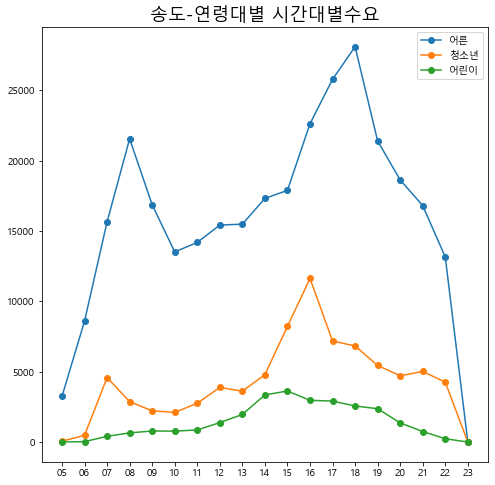

In [157]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어른'],marker='o',label='어른') ## 선그래프 생성
ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년')
ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이')

ax.legend() ## 범례

#그래프 제목 지정
plt.title('송도-연령대별 시간대별수요', fontsize=18)

plt.show()

-> 청소년/어린이는 자세하게 따로 시각화

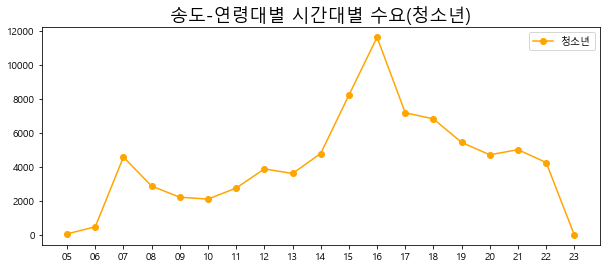

In [158]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['청소년'],marker='o',label='청소년', color='orange')

ax.legend() ## 범례

#그래프 제목 지정
plt.title('송도-연령대별 시간대별 수요(청소년)', fontsize=18)

plt.show()

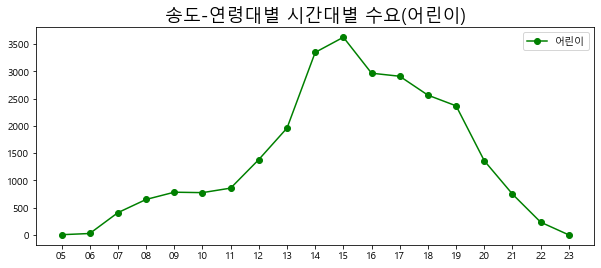

In [159]:
fig = plt.figure(figsize=(10,4))
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(실수요.index,실수요['어린이'],marker='o',label='어린이', color='green')

ax.legend() ## 범례


#그래프 제목 지정
plt.title('송도-연령대별 시간대별 수요(어린이)', fontsize=18)

plt.show()

### 🔗 분석11) 지역별/시간대별 정류장방면 분석(실수요고객 기준)

정류장 방면정보를 활용해 시간대별 어느방면으로의 통행이 많은지 표 또는 차트로 시각화 


### 11-1. 지역별 배차요청 많았던 방면 분석(계양)

In [160]:
방면=계양[계양['실수요여부']==1][['승차정류장방면', '요청식별id']]

In [161]:
#승차정류장방면 별 배차요청수요 count
방면=pd.DataFrame(방면.groupby('승차정류장방면')['요청식별id'].count().sort_values(ascending=False))

- 계양지역의 가장 배차 요청이 많았던 방면 Top10

In [162]:
방면.head(10)

,요청식별id
승차정류장방면,
다남식당 방면,1213
대촌마을 방면,451
부대앞 방면,267
남씨농원앞 방면,249
계양1동주민자치센터 방면,211
장기동 방면,207
귤현역방면,194
이화동노인정 방면,173
목상동마을입구 방면,142


### 11-2. 지역별 배차요청 많았던 방면 분석(검단)

In [163]:
방면=검단[검단['실수요여부']==1][['승차정류장방면', '요청식별id']]

In [164]:
#승차정류장방면 별 배차요청수요 count
방면=pd.DataFrame(방면.groupby('승차정류장방면')['요청식별id'].count().sort_values(ascending=False))

- 검단지역의 가장 배차 요청이 많았던 방면 Top10

In [165]:
방면.head(10)

,요청식별id
승차정류장방면,
당하동탑스빌아파트 방면,5707
이음대로.대성베르힐 방면,5267
서구영어마을 방면,4426
오류동마을 방면,3829
원당사거리/검단선사박물관방면,3818
유현사거리 방면,3704
아라센트럴파크 방면,3509
다남식당 방면,3418
한별초등학교 방면,3228


### 11-3. 지역별 배차요청 많았던 방면 분석(송도)

In [166]:
방면=송도[송도['실수요여부']==1][['승차정류장방면', '요청식별id']]

In [167]:
#승차정류장방면 별 배차요청수요 count
방면=pd.DataFrame(방면.groupby('승차정류장방면')['요청식별id'].count().sort_values(ascending=False))

- 송도지역의 가장 배차 요청이 많았던 방면 Top10

In [168]:
방면.head(10)

,요청식별id
승차정류장방면,
랜드마크시티센트럴더샵(106동) 방면,19704
송도호반베르디움3차에듀시티 방면,15761
달빛축제공원 방면,15406
송도SK뷰 방면,12791
힐스테이트레이크송도2차 방면,11614
캠퍼스타운역 방면,9649
e편한세상정문 방면,9612
힐스테이트송도더테라스(후문) 방면,8500
송도풍림아이원2단지 방면,8092


### 11-4. 시간대별 배차요청 많았던 방면 분석(계양)

In [169]:
방면=계양[계양['실수요여부']==1]
방면['시']=방면['요청시간'].dt.strftime("%H")

#필요한 열만 추출
방면=방면[['시', '승차정류장방면', '요청식별id']]

In [170]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시', '승차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [171]:
#시간별 배차요청 많은 top1 방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)

- 계양지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [172]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18])
방면.set_index(['시', '승차정류장방면'])

,,count
시,승차정류장방면,
05,다남식당 방면,11
06,이화동노인정 방면,121
07,남씨농원앞 방면,125
08,대촌마을 방면,166
09,다남식당 방면,108
10,다남식당 방면,47
11,다남식당 방면,23
12,다남식당 방면,58
13,다남식당 방면,46


### 11-5. 시간대별 배차요청 많았던 방면 분석(검단)

In [173]:
방면=검단[검단['실수요여부']==1]
방면['시']=방면['요청시간'].dt.strftime("%H")

#필요한 열만 추출
방면=방면[['시', '승차정류장방면', '요청식별id']]

In [174]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시', '승차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [175]:
#시간별 배차요청 많은 top1방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)
방면19=방면[방면['시']=='23'].sort_values('count', ascending=False).head(1)

- 검단지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [176]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18, 방면19])
방면.set_index(['시', '승차정류장방면'])

,,count
시,승차정류장방면,
05,참빛감리교회방면,70
06,한별초등학교 방면,206
07,서구영어마을 방면,465
08,아라센트럴파크 방면,562
09,이음대로.대성베르힐 방면,534
10,이음대로.대성베르힐 방면,450
11,이음대로.대성베르힐 방면,387
12,이음대로.대성베르힐 방면,346
13,이음대로.대성베르힐 방면,347


### 11-6. 시간대별 배차요청 많았던 방면 분석(송도)

In [177]:
방면=송도[송도['실수요여부']==1]
방면['시']=방면['요청시간'].dt.strftime("%H")

#필요한 열만 추출
방면=방면[['시', '승차정류장방면', '요청식별id']]

In [178]:
#시, 승차정류장방면 기준 배차요청 수요 count
방면=pd.DataFrame(방면.groupby(['시', '승차정류장방면'])['요청식별id'].count())
방면.columns=['count']
방면.reset_index(inplace=True)

In [179]:
#시간별 배차요청 많은 top1방면 추출
방면1=방면[방면['시']=='05'].sort_values('count', ascending=False).head(1)
방면2=방면[방면['시']=='06'].sort_values('count', ascending=False).head(1)
방면3=방면[방면['시']=='07'].sort_values('count', ascending=False).head(1)
방면4=방면[방면['시']=='08'].sort_values('count', ascending=False).head(1)
방면5=방면[방면['시']=='09'].sort_values('count', ascending=False).head(1)
방면6=방면[방면['시']=='10'].sort_values('count', ascending=False).head(1)
방면7=방면[방면['시']=='11'].sort_values('count', ascending=False).head(1)
방면8=방면[방면['시']=='12'].sort_values('count', ascending=False).head(1)
방면9=방면[방면['시']=='13'].sort_values('count', ascending=False).head(1)
방면10=방면[방면['시']=='14'].sort_values('count', ascending=False).head(1)
방면11=방면[방면['시']=='15'].sort_values('count', ascending=False).head(1)
방면12=방면[방면['시']=='16'].sort_values('count', ascending=False).head(1)
방면13=방면[방면['시']=='17'].sort_values('count', ascending=False).head(1)
방면14=방면[방면['시']=='18'].sort_values('count', ascending=False).head(1)
방면15=방면[방면['시']=='19'].sort_values('count', ascending=False).head(1)
방면16=방면[방면['시']=='20'].sort_values('count', ascending=False).head(1)
방면17=방면[방면['시']=='21'].sort_values('count', ascending=False).head(1)
방면18=방면[방면['시']=='22'].sort_values('count', ascending=False).head(1)
방면19=방면[방면['시']=='23'].sort_values('count', ascending=False).head(1)

- 송도지역의 시간대별 가장 배차 요청이 많았던 방면 Top1

In [180]:
방면=pd.concat([방면1, 방면2, 방면3, 방면4, 방면5, 방면6, 방면7, 방면8, 방면9, 방면10, 방면11, 방면12, 방면13, 방면14, 방면15, 방면16, 방면17, 방면18, 방면19])
방면.set_index(['시', '승차정류장방면'])

,,count
시,승차정류장방면,
05,달빛축제공원 방면,484
06,달빛축제공원 방면,1015
07,랜드마크시티센트럴더샵(106동) 방면,2109
08,달빛축제공원 방면,2484
09,랜드마크시티센트럴더샵(106동) 방면,1752
10,랜드마크시티센트럴더샵(106동) 방면,1238
11,랜드마크시티센트럴더샵(106동) 방면,1174
12,랜드마크시티센트럴더샵(106동) 방면,1074
13,랜드마크시티센트럴더샵(106동) 방면,1181


감사합니다^~^